# STA160 Final Project
#### Group Members:
- Sophia Tierney - sftierney@ucdavis.edu, Student ID: 917308455
- Aris Briones - anbriones@ucdavis.edu, Student ID: 917170309
- HungHsu (Allen) Chen - chhchen@ucdavis.edu, Student ID: 915145076
- Amay Kharbanda - akharbanda@ucdavis.edu, Student ID: 914798754

June 9, 2021


In [1]:
import requests
import json
import urllib.request
import pandas as pd
import datetime

**df_vacc_totals** contains cumulative totals for each state including:
- the population of the state according to 2019 Census data
- total number of distributed/allocated vaccines for the state - independent of brand/dosing break down. each value in this variable counts 2 doses for Pfizer and Moderna as 1 vaccine, or 1 dose of J&J
  - total number of vaccines administered to the population for the state - independent of brand/dosing break down
  - total number of vaccines distributed per 100K people (this takes into account first doses and second doses)
  - total number of vaccines administered per 100K people (this takes into account first doses and second doses)
- cumulative number of moderna, pfizer, and j&j vaccines distributed and administered to each state's population
- total completed vaccinations to the people of each state for moderna, pfizer, and j&j: these numbers are only taking into consideration the people who are fully vaccinated - not people who have only had their first doses

You can ignore the date in this dataframe: there is only 1 date because it only takes into account the cumulative totals to date. for example, the last time the data was pulled was for the week of 5/28: so these are the cumulative totals from the first date vaccines began being distributed, to 5/28. So this is why we are keeping these 2 dataframes seperated, there's no dates to really combine them on, but it will still be useful for EDA and modeling

**full_df** contains the breakdown of number of doses distributed for each of the 3 vaccine brands to each state, along with the weekly new COVID-19 deaths for each state.

**Note** that when we concatenated the moderna, pfizer, and j&j data with the covid deaths into 1 dataframe, the date starts at the first date in the vaccine data which was 2/15/21. The covid deaths data starts as far back as 12/2019 - but we seperated the covid death data into 2 different dataframes: one contatining 2020 death data and one containing 2021 death data. The 2021 death dataframe begins at 1/1/21 - but the "final" dataframe that we are working with (full_df) begins at 2/15/21.

In [2]:
vacc_json = requests.get("https://covid.cdc.gov/covid-data-tracker/COVIDData/getAjaxData", params={"id": "vaccination_data"}).json()
df_vacc_totals = pd.DataFrame(vacc_json["vaccination_data"])

In [3]:
df_vacc_totals.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    65 non-null     object 
 1   Location                                65 non-null     object 
 2   ShortName                               65 non-null     object 
 3   LongName                                65 non-null     object 
 4   Census2019                              64 non-null     float64
 5   date_type                               64 non-null     object 
 6   Doses_Distributed                       64 non-null     float64
 7   Doses_Administered                      65 non-null     int64  
 8   Dist_Per_100K                           64 non-null     float64
 9   Admin_Per_100K                          64 non-null     float64
 10  Administered_Moderna                    64 non-null     float64


In [4]:
df_vacc_totals = df_vacc_totals[['Date','LongName','Census2019', 'Doses_Distributed', 'Doses_Administered', 
                                 'Dist_Per_100K', 'Admin_Per_100K', 'Administered_Moderna', 'Administered_Pfizer', 
                                 'Administered_Janssen', 'Distributed_Moderna', 'Distributed_Pfizer', 
                                 'Distributed_Janssen', 'Series_Complete_Moderna','Series_Complete_Pfizer', 
                                 'Series_Complete_Janssen']]

In [5]:
df_vacc_totals = df_vacc_totals.rename(columns = {'Date': 'week', 'LongName': 'state', 'Census2019': 'pop_in_2019',
                                      'Doses_Distributed': 'tot_distributed', 
                                      'Doses_Administered': 'tot_administered', 
                                      'Dist_Per_100K': 'tot_dist_per100K',
                                      'Admin_Per_100K': 'tot_admin_per100K', 
                                      'Administered_Moderna': 'admin_moderna', 
                                      'Administered_Pfizer': 'admin_pfizer', 
                                      'Administered_Janssen': 'admin_jj',
                                      'Distributed_Moderna': 'dist_moderna', 
                                      'Distributed_Pfizer': 'dist_pfizer', 
                                      'Distributed_Janssen': 'dist_jj',
                                      'Series_Complete_Moderna': 'tot_complete_moderna', 
                                      'Series_Complete_Pfizer': 'tot_complete_pfizer',
                                      'Series_Complete_Janssen': 'tot_complete_jj'})
df_vacc_totals.head()

,week,state,pop_in_2019,tot_distributed,tot_administered,tot_dist_per100K,tot_admin_per100K,admin_moderna,admin_pfizer,admin_jj,dist_moderna,dist_pfizer,dist_jj,tot_complete_moderna,tot_complete_pfizer,tot_complete_jj
0,2021-06-09,United States,331996199.0,372495525.0,304753476,112199.0,91794.0,127513151.0,165715523.0,11296014.0,153605740.0,197488785.0,21401000.0,56906401.0,72852357.0,11160519.0
1,2021-06-09,Alaska,731545.0,819205.0,623531,111983.0,85235.0,271108.0,330340.0,21990.0,351200.0,409305.0,58700.0,125376.0,148586.0,20428.0
2,2021-06-09,Alabama,4903185.0,4646550.0,3040485,94766.0,62010.0,1468442.0,1471523.0,100520.0,2099160.0,2266290.0,281100.0,659904.0,682822.0,102785.0
3,2021-06-09,Arkansas,3017804.0,2793260.0,2123438,92559.0,70364.0,998383.0,1053554.0,70930.0,1250240.0,1364220.0,178800.0,446179.0,450144.0,69147.0
4,2021-06-09,American Samoa,55689.0,54030.0,43401,97021.0,77935.0,10594.0,32769.0,38.0,15600.0,37830.0,600.0,4587.0,14957.0,46.0


In [6]:
df_vacc_totals['week'].unique()

array(['2021-06-09'], dtype=object)

tot_complete_ : total amt of vaccinations completed, 2 doses for moderna/pfizer, 1 dose for JJ

the date/week is only up to the current date today, bc they are running totals of the cumulative numbers

In [7]:
url_moderna = 'https://data.cdc.gov/resource/b7pe-5nws.json'
url_jj = 'https://data.cdc.gov/resource/w9zu-fywh.json'
url_pfizer = 'https://data.cdc.gov/resource/saz5-9hgg.json'
url_deaths_jur = 'https://data.cdc.gov/resource/r8kw-7aab.json'

In [8]:
data_moderna = urllib.request.urlopen(url_moderna).read().decode()
data_jj = urllib.request.urlopen(url_jj).read().decode()
data_pfizer = urllib.request.urlopen(url_pfizer).read().decode()
data_deaths_jur = urllib.request.urlopen(url_deaths_jur).read().decode()

In [9]:
object_moderna = json.loads(data_moderna)
object_jj = json.loads(data_jj)
object_pfizer = json.loads(data_pfizer)
object_deaths_jur = json.loads(data_deaths_jur)

In [10]:
df_moderna = pd.DataFrame(object_moderna)
df_jj = pd.DataFrame(object_jj)
df_pfizer = pd.DataFrame(object_pfizer)
df_deaths_jur = pd.DataFrame(object_deaths_jur)

In [11]:
df_moderna['company'] = 'Moderna'
df_jj['company'] = 'Janssen'
df_pfizer['company'] = 'Pfizer'

In [12]:
df_deaths_jur.head()

,data_as_of,start_date,end_date,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2021-06-09T00:00:00.000,2019-12-29T00:00:00.000,2020-01-04T00:00:00.000,By Week,2019/2020,1,2020-01-04T00:00:00.000,United States,0,60172,98.00,4106,0,434,4540,NaN
1,2021-06-09T00:00:00.000,2020-01-05T00:00:00.000,2020-01-11T00:00:00.000,By Week,2020,2,2020-01-11T00:00:00.000,United States,2,60736,97.00,4153,1,474,4628,NaN
2,2021-06-09T00:00:00.000,2020-01-12T00:00:00.000,2020-01-18T00:00:00.000,By Week,2020,3,2020-01-18T00:00:00.000,United States,3,59360,98.00,4066,3,467,4533,NaN
3,2021-06-09T00:00:00.000,2020-01-19T00:00:00.000,2020-01-25T00:00:00.000,By Week,2020,4,2020-01-25T00:00:00.000,United States,2,59156,99.00,3916,0,500,4418,NaN
4,2021-06-09T00:00:00.000,2020-01-26T00:00:00.000,2020-02-01T00:00:00.000,By Week,2020,5,2020-02-01T00:00:00.000,United States,0,58831,99.00,3818,0,481,4299,NaN


In [13]:
df_deaths_jur = pd.DataFrame(object_deaths_jur)
df_deaths_jur = df_deaths_jur[df_deaths_jur['year'] == '2021'] 

In [14]:
pd.to_datetime(df_moderna['week_of_allocations']).dt.date.unique()
pd.to_datetime(df_jj['week_of_allocations']).dt.date.unique()
pd.to_datetime(df_pfizer['week_of_allocations']).dt.date.unique()

array([datetime.date(2021, 6, 14), datetime.date(2021, 6, 7),
       datetime.date(2021, 5, 31), datetime.date(2021, 5, 24),
       datetime.date(2021, 5, 17), datetime.date(2021, 5, 10),
       datetime.date(2021, 5, 3), datetime.date(2021, 4, 26),
       datetime.date(2021, 4, 19), datetime.date(2021, 4, 12),
       datetime.date(2021, 4, 5), datetime.date(2021, 3, 29),
       datetime.date(2021, 3, 22), datetime.date(2021, 3, 15),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 1)], dtype=object)

In [15]:
df_moderna['week_of_allocations'] = pd.to_datetime(df_moderna['week_of_allocations']).dt.date
df_jj['week_of_allocations'] = pd.to_datetime(df_jj['week_of_allocations']).dt.date
df_pfizer['week_of_allocations'] = pd.to_datetime(df_pfizer['week_of_allocations']).dt.date

In [16]:
df_moderna.head()
df_moderna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   jurisdiction           1000 non-null   object
 1   week_of_allocations    1000 non-null   object
 2   _1st_dose_allocations  1000 non-null   object
 3   _2nd_dose_allocations  1000 non-null   object
 4   company                1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [17]:
df_vacc_weekly = pd.concat([df_jj, df_moderna, df_pfizer])
df_vacc_weekly.tail()

,jurisdiction,week_of_allocations,_1st_dose_allocations,company,_2nd_dose_allocations
995,Rhode Island,2021-03-01,12870,Pfizer,12870
996,South Carolina,2021-03-01,57330,Pfizer,57330
997,South Dakota,2021-03-01,10530,Pfizer,10530
998,Tennessee,2021-03-01,76050,Pfizer,76050
999,Texas,2021-03-01,300690,Pfizer,300690


In [18]:
df_vacc_weekly.columns = ['state', 'week', '1st_dose', 'company', '2nd_dose']
df_vacc_weekly['week'] = pd.to_datetime(df_vacc_weekly['week'], errors ='coerce')
df_vacc_weekly.week.astype('int64').dtypes

dtype('int64')

In [19]:
df_vacc_weekly['week_num'] = df_vacc_weekly['week'].dt.isocalendar().week
df_deaths = df_deaths_jur.rename({'mmwr_week': 'week_num'}, axis = 'columns')
df_deaths['week_num'] = pd.to_numeric(df_deaths['week_num'])

In [20]:
df = pd.merge(df_vacc_weekly, df_deaths, on = ['week_num', 'state'])
df = df[['state', 'week', 'week_num', 'company', '1st_dose', '2nd_dose', 'covid_19_deaths']]
df = df[df['covid_19_deaths'].notna()].reset_index(drop = True)
df

,state,week,week_num,company,1st_dose,2nd_dose,covid_19_deaths
0,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13
1,District of Columbia,2021-05-10,19,Moderna,8300,8300,13
2,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13
3,Alabama,2021-05-10,19,Janssen,8500,NaN,43
4,Alabama,2021-05-10,19,Moderna,54900,54900,43
...,...,...,...,...,...,...,...
312,Colorado,2021-03-08,10,Pfizer,69030,69030,48
313,Arizona,2021-03-08,10,Moderna,67600,67600,127
314,Arizona,2021-03-08,10,Pfizer,85410,85410,127
315,California,2021-03-08,10,Moderna,380300,380300,592


In [21]:
df['week_num'].unique()

<IntegerArray>
[19, 18, 15, 14, 13, 12, 11, 9, 22, 21, 20, 17, 16, 10]
Length: 14, dtype: UInt32

In [22]:
df['week'].unique()

array(['2021-05-10T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-05T00:00:00.000000000',
       '2021-03-29T00:00:00.000000000', '2021-03-22T00:00:00.000000000',
       '2021-03-15T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-05-31T00:00:00.000000000', '2021-05-24T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-19T00:00:00.000000000', '2021-03-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [23]:
endpoint = "https://covid.cdc.gov/covid-data-tracker/COVIDData/getAjaxData"
response = requests.get(endpoint, params={"id": "us_trend_data"}).json()
state_data = pd.DataFrame(response["us_trend_data"])

In [24]:
state_data.head()
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   incidence                                       30240 non-null  float64
 1   state                                           30240 non-null  object 
 2   fips                                            30240 non-null  object 
 3   tot_cases                                       30240 non-null  int64  
 4   New_case                                        30240 non-null  int64  
 5   new_death                                       30240 non-null  int64  
 6   seven_day_avg_new_cases                         30240 non-null  int64  
 7   tot_deaths                                      30240 non-null  int64  
 8   seven_day_avg_new_deaths                        30240 non-null  int64  
 9   seven_day_cum_new_cases_per_100k       

In [25]:
state_data = state_data.drop(columns = ['incidence', 'fips', 'percent_positive_7_day', 'new_test_results_reported', 
                                        'total_test_results_reported_7_day_count_change', 'death_100k'])

cum_cases : total cases
avg_new_cases : avg new cases on a weekly basis/7 day moving avg

In [26]:
state_data = state_data.rename(columns = {'tot_cases': 'cum_cases', 'New_case': 'daily_new_cases', 'new_death': 'daily_new_deaths',
                                          'seven_day_avg_new_cases': 'avg_new_cases', 'tot_deaths': 'cum_deaths',
                                          'seven_day_avg_new_deaths': 'avg_new_deaths', 'seven_day_cum_new_cases_per_100k': 'cum_new_cases_per100K',
                                          'seven_day_cum_new_deaths_per_100k': 'cum_new_deaths_per100K'})
state_data.head()

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
0,Alabama,33,33,0,4,0,0,0.67,0.0,Jan 22 2020,NaN,NaN
1,Alabama,34,1,0,4,0,0,0.69,0.0,Jan 23 2020,NaN,NaN
2,Alabama,34,0,0,4,0,0,0.69,0.0,Jan 24 2020,NaN,NaN
3,Alabama,37,3,0,5,0,0,0.75,0.0,Jan 25 2020,NaN,NaN
4,Alabama,37,0,0,5,0,0,0.75,0.0,Jan 26 2020,NaN,NaN


In [27]:
state_data.tail()

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
30235,Wyoming,60628,79,0,69,720,0,83.63,0.17,Jun 04 2021,NaN,NaN
30236,Wyoming,60675,47,0,68,720,0,82.42,0.17,Jun 05 2021,NaN,NaN
30237,Wyoming,60722,47,0,67,720,0,81.21,0.17,Jun 06 2021,NaN,NaN
30238,Wyoming,60773,51,0,66,720,0,80.69,0.17,Jun 07 2021,NaN,NaN
30239,Wyoming,60849,76,5,69,725,0,83.80,0.86,Jun 08 2021,NaN,NaN


In [28]:
state_data['date'] = pd.to_datetime(state_data['date'], errors = 'coerce')
state_data.head()

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
0,Alabama,33,33,0,4,0,0,0.67,0.0,2020-01-22,NaN,NaN
1,Alabama,34,1,0,4,0,0,0.69,0.0,2020-01-23,NaN,NaN
2,Alabama,34,0,0,4,0,0,0.69,0.0,2020-01-24,NaN,NaN
3,Alabama,37,3,0,5,0,0,0.75,0.0,2020-01-25,NaN,NaN
4,Alabama,37,0,0,5,0,0,0.75,0.0,2020-01-26,NaN,NaN


In [29]:
state_data20 = state_data[state_data['date'].dt.year == 2020]
state_data21 = state_data[state_data['date'].dt.year == 2021]
state_data21.head()

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
345,Alabama,392041,2295,82,4519,7233,73,645.23,10.48,2021-01-01,NaN,NaN
346,Alabama,395455,3414,78,4512,7311,74,644.23,10.58,2021-01-02,NaN,NaN
347,Alabama,398741,3286,75,4536,7386,74,647.70,10.61,2021-01-03,NaN,NaN
348,Alabama,405404,6663,91,4508,7477,77,643.68,11.05,2021-01-04,NaN,NaN
349,Alabama,410812,5408,70,4446,7547,76,634.73,10.87,2021-01-05,NaN,NaN


In [30]:
state_data21.date.astype('int64')
state_data21['week_num'] = state_data21['date'].dt.isocalendar().week
state_data21.loc[:,'week_num'] = state_data21['week_num'].replace([53], 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [31]:
state_data21.head()

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths,week_num
345,Alabama,392041,2295,82,4519,7233,73,645.23,10.48,2021-01-01,NaN,NaN,0
346,Alabama,395455,3414,78,4512,7311,74,644.23,10.58,2021-01-02,NaN,NaN,0
347,Alabama,398741,3286,75,4536,7386,74,647.70,10.61,2021-01-03,NaN,NaN,0
348,Alabama,405404,6663,91,4508,7477,77,643.68,11.05,2021-01-04,NaN,NaN,1
349,Alabama,410812,5408,70,4446,7547,76,634.73,10.87,2021-01-05,NaN,NaN,1


In [32]:
state_data21.shape

(9540, 13)

In [33]:
state_data21[state_data21.cum_cases == 0]
state_data21[state_data21.cum_cases == 0]['state'].unique()

array(['Federated States of Micronesia', 'Palau'], dtype=object)

In [34]:
state_data21[state_data21.avg_new_cases == 0]
state_data21[state_data21.avg_new_cases == 0]['state'].unique()

array(['Commonwealth of the Northern Mariana Islands',
       'Federated States of Micronesia', 'Palau',
       'Republic of Marshall Islands'], dtype=object)

In [35]:
state_data21[state_data21.cum_deaths == 0]
state_data21[state_data21.cum_deaths == 0]['state'].unique()

array(['Federated States of Micronesia', 'Palau',
       'Republic of Marshall Islands'], dtype=object)

In [36]:
state_data21[state_data21.avg_new_deaths == 0]['state'].value_counts()

Republic of Marshall Islands                    159
Guam                                            159
Federated States of Micronesia                  159
Palau                                           159
Virgin Islands                                  159
Commonwealth of the Northern Mariana Islands    159
Alaska                                          133
Vermont                                         106
Hawaii                                           98
North Dakota                                     86
Wyoming                                          85
Maine                                            31
District of Columbia                             29
Nebraska                                         28
Rhode Island                                     17
South Dakota                                     16
Montana                                          12
Delaware                                         11
New Hampshire                                     9
Oklahoma    

In [37]:
state_data21[state_data21.cum_new_cases_per100K == 0]

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths,week_num
3369,Commonwealth of the Northern Mariana Islands,122,0,0,0,2,0,0.0,0.0,2021-01-01,NaN,NaN,0
3370,Commonwealth of the Northern Mariana Islands,122,0,0,0,2,0,0.0,0.0,2021-01-02,NaN,NaN,0
3371,Commonwealth of the Northern Mariana Islands,122,0,0,0,2,0,0.0,0.0,2021-01-03,NaN,NaN,0
3372,Commonwealth of the Northern Mariana Islands,122,0,0,0,2,0,0.0,0.0,2021-01-04,NaN,NaN,1
3373,Commonwealth of the Northern Mariana Islands,122,0,0,0,2,0,0.0,0.0,2021-01-05,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23179,Republic of Marshall Islands,4,0,0,0,0,0,0.0,0.0,2021-06-04,NaN,NaN,22
23180,Republic of Marshall Islands,4,0,0,0,0,0,0.0,0.0,2021-06-05,NaN,NaN,22
23181,Republic of Marshall Islands,4,0,0,0,0,0,0.0,0.0,2021-06-06,NaN,NaN,22
23182,Republic of Marshall Islands,4,0,0,0,0,0,0.0,0.0,2021-06-07,NaN,NaN,23


In [38]:
state_data21[state_data21.cum_new_deaths_per100K == 0]

,state,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths,week_num
881,Alaska,52940,113,0,135,308,0,129.73,0.0,2021-02-02,NaN,NaN,5
882,Alaska,53116,176,0,137,308,0,131.23,0.0,2021-02-03,NaN,NaN,5
883,Alaska,53273,157,0,134,308,0,128.91,0.0,2021-02-04,NaN,NaN,5
884,Alaska,53433,160,0,132,308,0,126.58,0.0,2021-02-05,NaN,NaN,5
945,Alaska,61747,217,0,172,340,0,165.27,0.0,2021-04-07,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27709,Virgin Islands,3450,4,0,15,27,0,104.13,0.0,2021-05-29,NaN,NaN,21
27710,Virgin Islands,3454,4,0,14,27,0,96.48,0.0,2021-05-30,NaN,NaN,21
27711,Virgin Islands,3458,4,0,10,27,0,71.65,0.0,2021-05-31,NaN,NaN,22
27712,Virgin Islands,3465,7,0,9,27,0,63.05,0.0,2021-06-01,NaN,NaN,22


In [39]:
state_data21['state'].value_counts()

Louisiana                                       159
New York City                                   159
Delaware                                        159
Missouri                                        159
Oregon                                          159
New Mexico                                      159
Kansas                                          159
North Dakota                                    159
Republic of Marshall Islands                    159
Maine                                           159
Puerto Rico                                     159
Virginia                                        159
New York                                        159
Kentucky                                        159
Mississippi                                     159
Vermont                                         159
Ohio                                            159
New Jersey                                      159
Alaska                                          159
Arizona     

In [40]:
#state_data21.sort_values(by = ['week_num'], axis = 0)
#sorted(state_data21['week_num'].unique())
state_data21['week_num'].unique()

<IntegerArray>
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23]
Length: 24, dtype: UInt32

In [41]:
#df.sort_values(by = ['week_num'], axis = 0)
#sorted(df['week_num'].unique())
df['week_num'].unique()

<IntegerArray>
[19, 18, 15, 14, 13, 12, 11, 9, 22, 21, 20, 17, 16, 10]
Length: 14, dtype: UInt32

In [42]:
unique_vals = state_data21.apply(pd.Series.nunique, axis = 'rows')
print(unique_vals)

state                            60
cum_cases                      8625
daily_new_cases                3366
daily_new_deaths                452
avg_new_cases                  3428
cum_deaths                     6173
avg_new_deaths                  428
cum_new_cases_per100K          7391
cum_new_deaths_per100K         1095
date                            159
historical_new_total_cases       13
historical_new_total_deaths      27
week_num                         24
dtype: int64


In [43]:
full_df = pd.merge(df, state_data21, on = ['week_num', 'state'])

In [44]:
full_df.head()

,state,week,week_num,company,1st_dose,2nd_dose,covid_19_deaths,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
0,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48195,15,0,41,1110,0,41.37,0.57,2021-05-10,NaN,NaN
1,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48282,87,3,42,1113,1,41.94,0.99,2021-05-11,NaN,NaN
2,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48336,54,2,42,1115,0,41.80,0.85,2021-05-12,NaN,NaN
3,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48404,68,0,46,1115,0,45.91,0.71,2021-05-13,NaN,NaN
4,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48424,20,1,41,1116,0,40.81,0.85,2021-05-14,NaN,NaN


In [45]:
full_df.describe()

,week_num,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,historical_new_total_cases,historical_new_total_deaths
count,2219.000000,2.219000e+03,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,0.0,0.0
mean,14.769716,1.040029e+06,1226.597566,21.462370,1263.990086,18102.222623,22.328526,99.725354,1.612014,NaN,NaN
std,3.830100,1.090859e+06,1456.476054,29.037177,1394.442354,18213.864456,27.653576,61.356279,1.113602,NaN,NaN
min,9.000000,4.068400e+04,0.000000,0.000000,21.000000,358.000000,0.000000,10.310000,0.000000,NaN,NaN
25%,12.000000,3.309700e+05,263.000000,2.000000,320.000000,5972.000000,5.000000,48.415000,0.860000,NaN,NaN
50%,14.000000,5.345750e+05,702.000000,9.000000,802.000000,10920.000000,9.000000,83.500000,1.310000,NaN,NaN
75%,18.000000,1.109958e+06,1600.500000,28.000000,1514.000000,20368.000000,33.000000,145.710000,2.050000,NaN,NaN
max,22.000000,3.690868e+06,8925.000000,159.000000,6651.000000,62473.000000,162.000000,268.030000,6.570000,NaN,NaN


In [46]:
full_df['state'].unique()

array(['District of Columbia', 'Alabama', 'Florida', 'Georgia',
       'Arkansas', 'Colorado', 'Arizona', 'California', 'Connecticut',
       'Delaware', 'Alaska'], dtype=object)

In [47]:
full_df[full_df['company'] == 'Pfizer']

,state,week,week_num,company,1st_dose,2nd_dose,covid_19_deaths,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
14,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13,48195,15,0,41,1110,0,41.37,0.57,2021-05-10,NaN,NaN
15,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13,48282,87,3,42,1113,1,41.94,0.99,2021-05-11,NaN,NaN
16,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13,48336,54,2,42,1115,0,41.80,0.85,2021-05-12,NaN,NaN
17,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13,48404,68,0,46,1115,0,45.91,0.71,2021-05-13,NaN,NaN
18,District of Columbia,2021-05-10,19,Pfizer,11700,11700,13,48424,20,1,41,1116,0,40.81,0.85,2021-05-14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,California,2021-03-08,10,Pfizer,479700,479700,592,3544681,2802,92,2753,59809,102,48.78,1.82,2021-03-10,NaN,NaN
2215,California,2021-03-08,10,Pfizer,479700,479700,592,3547443,2762,91,2692,59900,98,47.70,1.75,2021-03-11,NaN,NaN
2216,California,2021-03-08,10,Pfizer,479700,479700,592,3550039,2596,82,2644,59982,93,46.85,1.66,2021-03-12,NaN,NaN
2217,California,2021-03-08,10,Pfizer,479700,479700,592,3552522,2483,85,2582,60067,90,45.76,1.60,2021-03-13,NaN,NaN


In [48]:
full_df['date'].unique()

array(['2021-05-10T00:00:00.000000000', '2021-05-11T00:00:00.000000000',
       '2021-05-12T00:00:00.000000000', '2021-05-13T00:00:00.000000000',
       '2021-05-14T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
       '2021-05-04T00:00:00.000000000', '2021-05-05T00:00:00.000000000',
       '2021-05-06T00:00:00.000000000', '2021-05-07T00:00:00.000000000',
       '2021-05-08T00:00:00.000000000', '2021-05-09T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-13T00:00:00.000000000',
       '2021-04-14T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-04-16T00:00:00.000000000', '2021-04-17T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', '2021-04-05T00:00:00.000000000',
       '2021-04-06T00:00:00.000000000', '2021-04-07T00:00:00.000000000',
       '2021-04-08T00:00:00.000000000', '2021-04-09T00:00:00.000000000',
       '2021-04-10T00:00:00.000000000', '2021-04-11

In [49]:
full_df['week_num'].unique()

<IntegerArray>
[19, 18, 15, 14, 13, 12, 11, 9, 22, 21, 20, 17, 16, 10]
Length: 14, dtype: UInt32

In [50]:
full_df[full_df['week_num'] == 22]

,state,week,week_num,company,1st_dose,2nd_dose,covid_19_deaths,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
1533,Connecticut,2021-05-31,22,Moderna,40320,40320,0,347506,55,0,113,8238,2,22.30,0.53,2021-05-31,NaN,NaN
1534,Connecticut,2021-05-31,22,Moderna,40320,40320,0,347563,57,6,95,8244,3,18.82,0.65,2021-06-01,NaN,NaN
1535,Connecticut,2021-05-31,22,Moderna,40320,40320,0,347678,115,3,99,8247,2,19.58,0.56,2021-06-02,NaN,NaN
1536,Connecticut,2021-05-31,22,Moderna,40320,40320,0,347748,70,0,87,8245,2,17.14,0.48,2021-06-03,NaN,NaN
1537,Connecticut,2021-05-31,22,Moderna,40320,40320,0,347891,143,1,78,8246,1,15.43,0.28,2021-06-04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,Alaska,2021-05-31,22,Pfizer,16830,16830,0,67541,34,0,32,362,0,30.62,0.00,2021-06-02,NaN,NaN
1627,Alaska,2021-05-31,22,Pfizer,16830,16830,0,67591,50,0,33,362,0,31.99,0.00,2021-06-03,NaN,NaN
1628,Alaska,2021-05-31,22,Pfizer,16830,16830,0,67648,57,0,35,362,0,33.49,0.00,2021-06-04,NaN,NaN
1629,Alaska,2021-05-31,22,Pfizer,16830,16830,0,67664,16,0,33,362,0,32.12,0.00,2021-06-05,NaN,NaN


In [51]:
df_vacc_totals.head()
df_vacc_totals.rename(columns = {'week':'date'}, inplace = True)
df_vacc_totals

,date,state,pop_in_2019,tot_distributed,tot_administered,tot_dist_per100K,tot_admin_per100K,admin_moderna,admin_pfizer,admin_jj,dist_moderna,dist_pfizer,dist_jj,tot_complete_moderna,tot_complete_pfizer,tot_complete_jj
0,2021-06-09,United States,331996199.0,372495525.0,304753476,112199.0,91794.0,127513151.0,165715523.0,11296014.0,153605740.0,197488785.0,21401000.0,56906401.0,72852357.0,11160519.0
1,2021-06-09,Alaska,731545.0,819205.0,623531,111983.0,85235.0,271108.0,330340.0,21990.0,351200.0,409305.0,58700.0,125376.0,148586.0,20428.0
2,2021-06-09,Alabama,4903185.0,4646550.0,3040485,94766.0,62010.0,1468442.0,1471523.0,100520.0,2099160.0,2266290.0,281100.0,659904.0,682822.0,102785.0
3,2021-06-09,Arkansas,3017804.0,2793260.0,2123438,92559.0,70364.0,998383.0,1053554.0,70930.0,1250240.0,1364220.0,178800.0,446179.0,450144.0,69147.0
4,2021-06-09,American Samoa,55689.0,54030.0,43401,97021.0,77935.0,10594.0,32769.0,38.0,15600.0,37830.0,600.0,4587.0,14957.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2021-06-09,Washington,7614893.0,9087720.0,7920142,119341.0,104009.0,3237274.0,4364934.0,313314.0,3676380.0,4916340.0,495000.0,1486149.0,1929711.0,311000.0
61,2021-06-09,Wisconsin,5822434.0,5986665.0,5600486,102821.0,96188.0,2344220.0,3034083.0,221604.0,2573560.0,3096405.0,316700.0,1072863.0,1380305.0,214186.0
62,2021-06-09,West Virginia,1792147.0,1861835.0,1336879,103889.0,74597.0,629279.0,676778.0,30637.0,843620.0,908115.0,110100.0,286051.0,303955.0,31570.0
63,2021-06-09,Wyoming,578759.0,509135.0,404188,87970.0,69837.0,195217.0,193794.0,14953.0,244840.0,230295.0,34000.0,87056.0,87270.0,14280.0


In [52]:
url_demo = 'https://data.cdc.gov/resource/km4m-vcsb.json'

data_demo = urllib.request.urlopen(url_demo).read().decode()

obj_demo = json.loads(data_demo)

vacc_demo = pd.DataFrame(obj_demo)

In [53]:
vacc_demo.head()

,date,demographic_category,administered_dose1,administered_dose1_pct_known,administered_dose1_pct_us,series_complete_yes,administered_dose1_pct,series_complete_pop_pct,series_complete_pop_pct_known,series_complete_pop_pct_us
0,2021-06-09T00:00:00.000,Ages_75+_yrs,18103668,11.4,0,15871333,84.4,74,12.2,0
1,2021-06-09T00:00:00.000,Race_eth_NHAsian,5960478,6.1,0,5235428,34,29.8,6,0
2,2021-06-09T00:00:00.000,Race_eth_NHNHOPI,294219,0.3,0,240225,33,26.9,0.3,0
3,2021-06-09T00:00:00.000,Race_eth_unknown,60861762,62.1,0,43710531,0,0,50.5,0
4,2021-06-09T00:00:00.000,Race_eth_NHAIAN,998034,1,0,816961,42.6,34.9,0.9,0


In [54]:
vacc_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   date                           1000 non-null   object
 1   demographic_category           1000 non-null   object
 2   administered_dose1             1000 non-null   object
 3   administered_dose1_pct_known   1000 non-null   object
 4   administered_dose1_pct_us      1000 non-null   object
 5   series_complete_yes            1000 non-null   object
 6   administered_dose1_pct         1000 non-null   object
 7   series_complete_pop_pct        1000 non-null   object
 8   series_complete_pop_pct_known  1000 non-null   object
 9   series_complete_pop_pct_us     1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [55]:
vacc_demo['demographic_category'].unique() # demographic groups

array(['Ages_75+_yrs', 'Race_eth_NHAsian', 'Race_eth_NHNHOPI',
       'Race_eth_unknown', 'Race_eth_NHAIAN', 'Ages_65-74_yrs',
       'Race_eth_NHBlack', 'Ages_<12yrs', 'US', 'Race_eth_Hispanic',
       'Sex_unknown', 'Ages_<18yrs', 'Race_eth_known', 'Ages_16-17_yrs',
       'Age_unknown', 'Race_eth_NHMult_Oth', 'Ages_50-64_yrs',
       'Ages_18-24_yrs', 'Age_known', 'Ages_40-49_yrs', 'Sex_known',
       'Sex_Female', 'Ages_12-15_yrs', 'Race_eth_NHWhite',
       'Ages_25-39_yrs', 'Ages_30-39_yrs', 'Ages_18-29_yrs', 'Sex_Male'],
      dtype=object)

In [56]:
df_vacc_totals.state.unique()

array(['United States', 'Alaska', 'Alabama', 'Arkansas', 'American Samoa',
       'Arizona', 'Bureau of Prisons', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Dept of Defense',
       'Delaware', 'Florida', 'Federated States of Micronesia', 'Georgia',
       'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Indian Health Svc', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Marshall Islands', 'Michigan', 'Minnesota',
       'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York State', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'Republic of Palau', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Veterans Health', 'Virgin Islands', 'Vermont', 'Washington',
       'Wisconsin', 'West Virgin

## Exploratory Data Analysis

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

### df_vacc_totals

In [58]:
df_vacc_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  65 non-null     object 
 1   state                 65 non-null     object 
 2   pop_in_2019           64 non-null     float64
 3   tot_distributed       64 non-null     float64
 4   tot_administered      65 non-null     int64  
 5   tot_dist_per100K      64 non-null     float64
 6   tot_admin_per100K     64 non-null     float64
 7   admin_moderna         64 non-null     float64
 8   admin_pfizer          64 non-null     float64
 9   admin_jj              64 non-null     float64
 10  dist_moderna          64 non-null     float64
 11  dist_pfizer           64 non-null     float64
 12  dist_jj               64 non-null     float64
 13  tot_complete_moderna  64 non-null     float64
 14  tot_complete_pfizer   64 non-null     float64
 15  tot_complete_jj       64 

date                     1
state                   65
pop_in_2019             62
tot_distributed         64
tot_administered        65
tot_dist_per100K        62
tot_admin_per100K       62
admin_moderna           64
admin_pfizer            63
admin_jj                64
dist_moderna            64
dist_pfizer             62
dist_jj                 64
tot_complete_moderna    64
tot_complete_pfizer     64
tot_complete_jj         64
dtype: int64


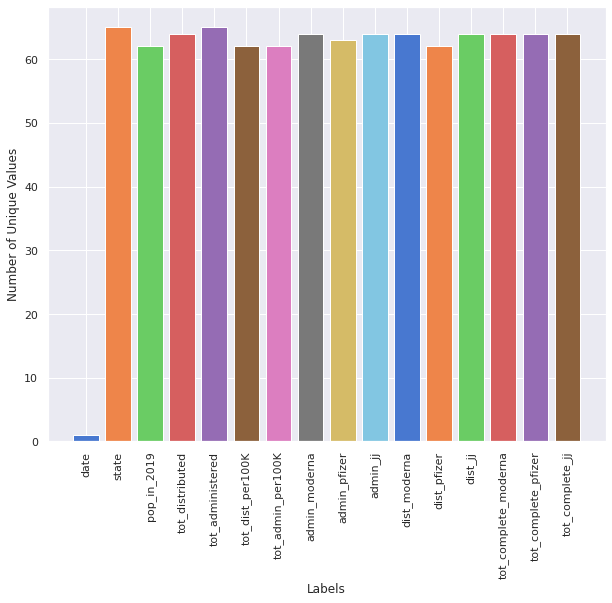

In [59]:
unique_vals = df_vacc_totals.apply(pd.Series.nunique, axis='rows')
print(unique_vals)
labels = list(unique_vals.index)
plt.figure(figsize=(10, 8))
plt.bar(x = labels, height = unique_vals.values, color = sns.color_palette('muted'))
plt.xticks(unique_vals.index, labels, rotation = 'vertical')
plt.xlabel('Labels')
plt.ylabel('Number of Unique Values')
plt.show()

In [60]:
df_vacc_totals.shape

(65, 16)

In [61]:
print(df_vacc_totals.isnull().sum())

date                    0
state                   0
pop_in_2019             1
tot_distributed         1
tot_administered        0
tot_dist_per100K        1
tot_admin_per100K       1
admin_moderna           1
admin_pfizer            1
admin_jj                1
dist_moderna            1
dist_pfizer             1
dist_jj                 1
tot_complete_moderna    1
tot_complete_pfizer     1
tot_complete_jj         1
dtype: int64


In [62]:
df_vacc_totals[df_vacc_totals.isnull().values.any(axis=1)]

,date,state,pop_in_2019,tot_distributed,tot_administered,tot_dist_per100K,tot_admin_per100K,admin_moderna,admin_pfizer,admin_jj,dist_moderna,dist_pfizer,dist_jj,tot_complete_moderna,tot_complete_pfizer,tot_complete_jj
64,2021-06-09,Long Term Care,NaN,NaN,7856576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_vacc_totals = df_vacc_totals.fillna(0)

In [64]:
print(df_vacc_totals.isnull().sum())

date                    0
state                   0
pop_in_2019             0
tot_distributed         0
tot_administered        0
tot_dist_per100K        0
tot_admin_per100K       0
admin_moderna           0
admin_pfizer            0
admin_jj                0
dist_moderna            0
dist_pfizer             0
dist_jj                 0
tot_complete_moderna    0
tot_complete_pfizer     0
tot_complete_jj         0
dtype: int64


In [65]:
duplicate_rows_df = df_vacc_totals[df_vacc_totals.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [66]:
# This row is saved but removed below from the df_vacc_totals data

first_row_US = df_vacc_totals.iloc[0]
first_row_US

date                       2021-06-09
state                   United States
pop_in_2019               3.31996e+08
tot_distributed           3.72496e+08
tot_administered            304753476
tot_dist_per100K               112199
tot_admin_per100K               91794
admin_moderna             1.27513e+08
admin_pfizer              1.65716e+08
admin_jj                   1.1296e+07
dist_moderna              1.53606e+08
dist_pfizer               1.97489e+08
dist_jj                    2.1401e+07
tot_complete_moderna      5.69064e+07
tot_complete_pfizer       7.28524e+07
tot_complete_jj           1.11605e+07
Name: 0, dtype: object

In [67]:
# Removing first row
df_vacc_totals = df_vacc_totals.iloc[1: , :]

In [68]:
df_vacc_totals.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_in_2019,64.0,5.219985e+06,7.005948e+06,0.0,854009.75,3117613.0,6756457.75,39512223.0
tot_distributed,64.0,6.016159e+06,8.091460e+06,0.0,1211580.00,3633817.5,7122878.75,48056890.0
tot_administered,64.0,5.029028e+06,6.609794e+06,24369.0,1139818.50,2955154.5,6177784.50,39764396.0
tot_dist_per100K,64.0,1.034121e+05,3.197087e+04,0.0,95690.00,106831.5,121679.25,148731.0
tot_admin_per100K,64.0,8.385512e+04,2.810675e+04,0.0,74693.75,86032.5,101100.75,136086.0
admin_moderna,64.0,2.062154e+06,2.753788e+06,0.0,404922.75,1221639.0,2575914.25,16583915.0
admin_pfizer,64.0,2.660779e+06,3.626408e+06,0.0,516283.75,1494563.0,3138254.00,21763289.0
admin_jj,64.0,1.797589e+05,2.529258e+05,0.0,32420.50,105412.0,208010.25,1411693.0
dist_moderna,64.0,2.490721e+06,3.287392e+06,0.0,501915.00,1567550.0,3051090.00,19577860.0
dist_pfizer,64.0,3.178668e+06,4.339131e+06,0.0,652860.00,1877167.5,3819513.75,25863630.0


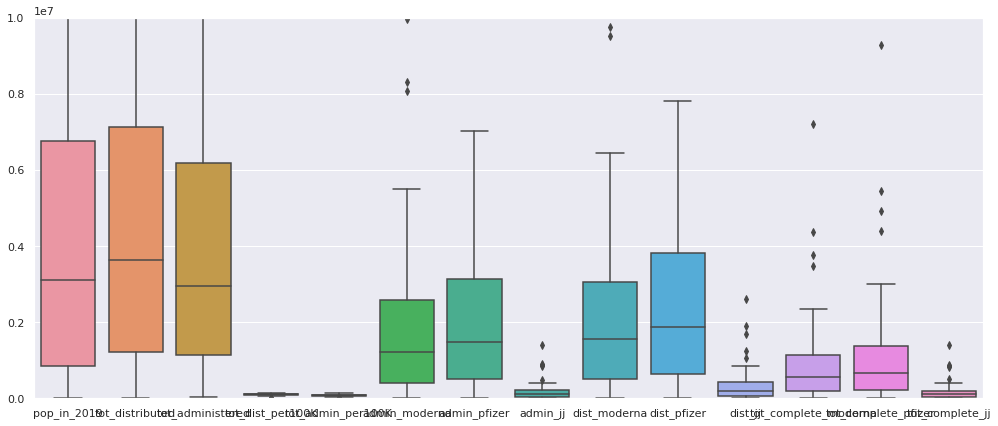

In [69]:
plt.figure(figsize=(17,7))
# This limit was selected to observe the box plots as much as possible without losing too much visual data
plt.ylim(0, 10000000)
sns.boxplot(data=df_vacc_totals)

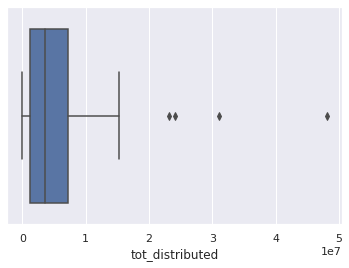

In [70]:
sns.boxplot(x=df_vacc_totals['tot_distributed'])

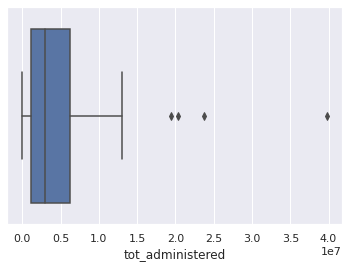

In [71]:
sns.boxplot(x=df_vacc_totals['tot_administered'])

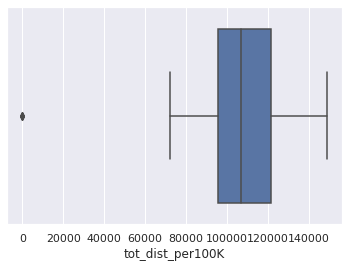

In [72]:
sns.boxplot(x=df_vacc_totals['tot_dist_per100K'])

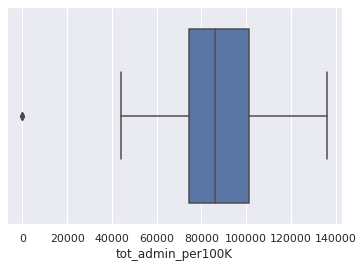

In [73]:
sns.boxplot(x=df_vacc_totals['tot_admin_per100K'])

,pop_in_2019,tot_distributed,tot_administered,tot_dist_per100K,tot_admin_per100K,admin_moderna,admin_pfizer,admin_jj,dist_moderna,dist_pfizer,dist_jj,tot_complete_moderna,tot_complete_pfizer,tot_complete_jj
pop_in_2019,1.000000,0.988409,0.971576,0.203815,0.198296,0.980980,0.983097,0.975209,0.987014,0.988623,0.981758,0.979226,0.981287,0.975916
tot_distributed,0.988409,1.000000,0.987021,0.158744,0.162454,0.997926,0.997459,0.987888,0.999603,0.999619,0.991698,0.996858,0.996474,0.989111
tot_administered,0.971576,0.987021,1.000000,0.099953,0.117702,0.988150,0.988748,0.981108,0.986298,0.987133,0.976643,0.987220,0.987884,0.982072
tot_dist_per100K,0.203815,0.158744,0.099953,1.000000,0.962255,0.145136,0.170633,0.172924,0.149348,0.168041,0.136398,0.147088,0.173262,0.174686
tot_admin_per100K,0.198296,0.162454,0.117702,0.962255,1.000000,0.157348,0.183752,0.191116,0.152574,0.172336,0.138045,0.160411,0.187168,0.192411
admin_moderna,0.980980,0.997926,0.988150,0.145136,0.157348,1.000000,0.998011,0.989847,0.998300,0.997025,0.989067,0.999399,0.997502,0.990926
admin_pfizer,0.983097,0.997459,0.988748,0.170633,0.183752,0.998011,1.000000,0.990794,0.996444,0.997986,0.985143,0.997241,0.999386,0.991831
admin_jj,0.975209,0.987888,0.981108,0.172924,0.191116,0.989847,0.990794,1.000000,0.986686,0.987598,0.984525,0.989622,0.990451,0.999763
dist_moderna,0.987014,0.999603,0.986298,0.149348,0.152574,0.998300,0.996444,0.986686,1.000000,0.998548,0.991982,0.997431,0.995754,0.987901
dist_pfizer,0.988623,0.999619,0.987133,0.168041,0.172336,0.997025,0.997986,0.987598,0.998548,1.000000,0.989009,0.995896,0.996898,0.988793


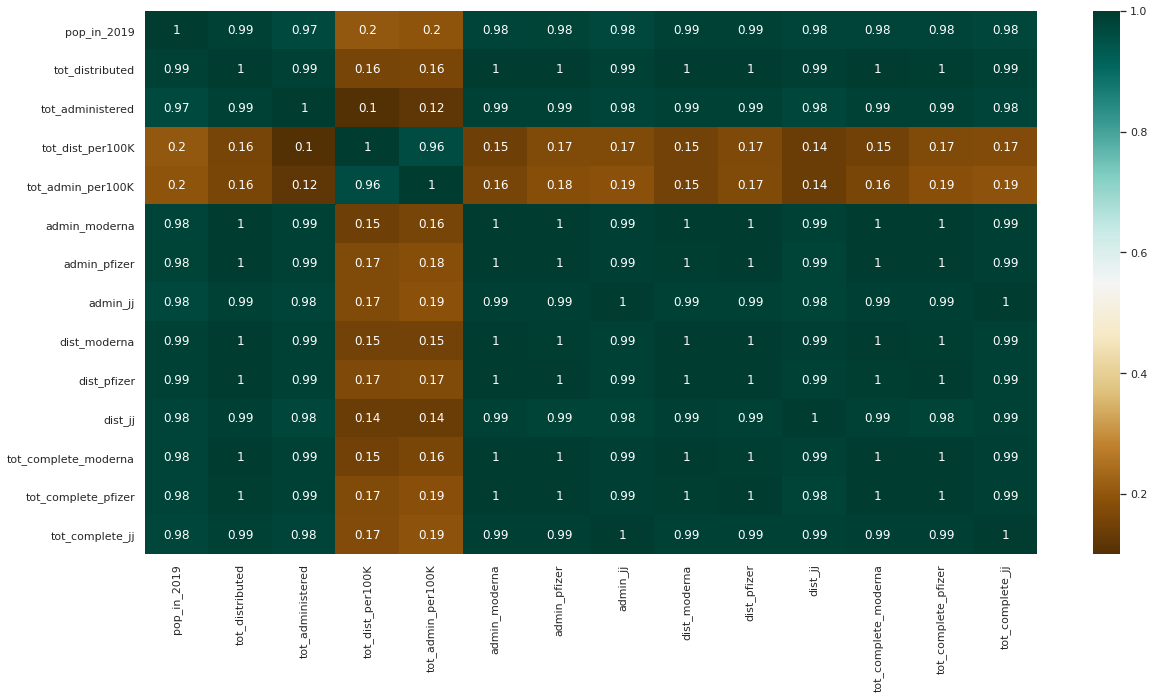

In [74]:
plt.figure(figsize=(20,10))
c= df_vacc_totals.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

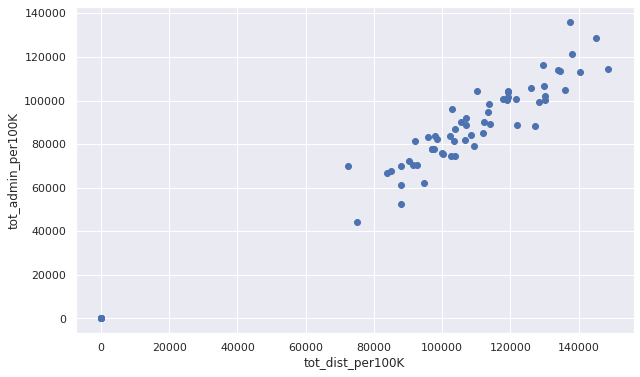

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_vacc_totals['tot_dist_per100K'], df_vacc_totals['tot_admin_per100K'])
ax.set_xlabel('tot_dist_per100K')
ax.set_ylabel('tot_admin_per100K')
plt.show()

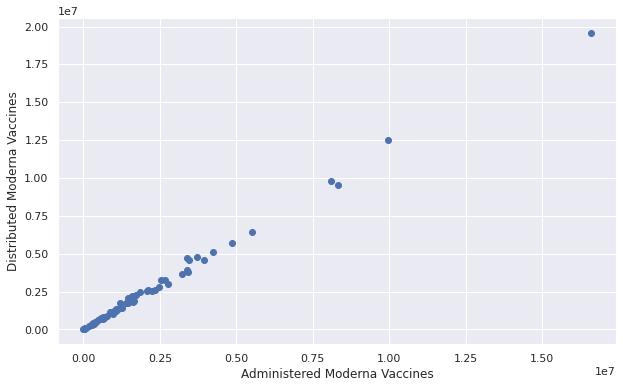

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_vacc_totals['admin_moderna'], df_vacc_totals['dist_moderna'])
ax.set_xlabel('Administered Moderna Vaccines')
ax.set_ylabel('Distributed Moderna Vaccines')
plt.show()

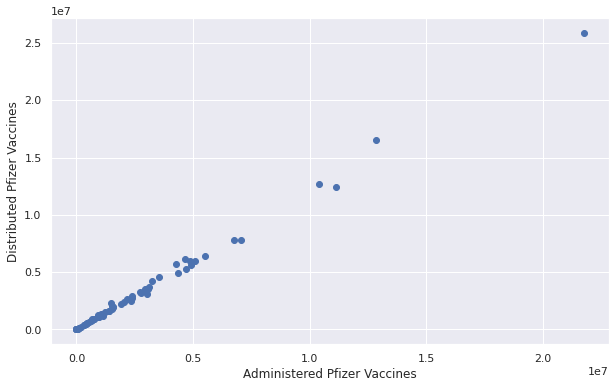

In [77]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_vacc_totals['admin_pfizer'], df_vacc_totals['dist_pfizer'])
ax.set_xlabel('Administered Pfizer Vaccines')
ax.set_ylabel('Distributed Pfizer Vaccines')
plt.show()

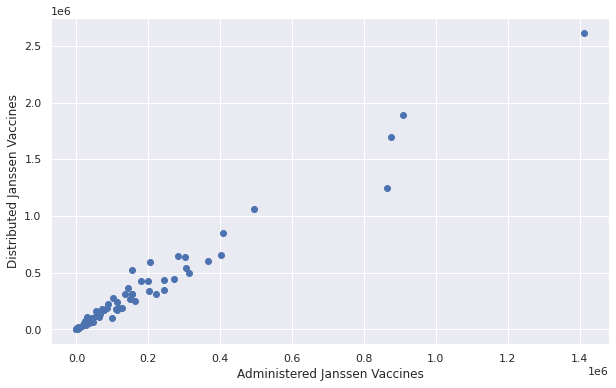

In [78]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_vacc_totals['admin_jj'], df_vacc_totals['dist_jj'])
ax.set_xlabel('Administered Janssen Vaccines')
ax.set_ylabel('Distributed Janssen Vaccines')
plt.show()

In [79]:
states = list(df_vacc_totals.state.unique())

In [81]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", 
               "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", 
               "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", 
               "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", 
               "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", 
               "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", 
               "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

a = list(set(states) - set(state_names))

df_vacc_totals[df_vacc_totals["state"].isin(a)]

,date,state,pop_in_2019,tot_distributed,tot_administered,tot_dist_per100K,tot_admin_per100K,admin_moderna,admin_pfizer,admin_jj,dist_moderna,dist_pfizer,dist_jj,tot_complete_moderna,tot_complete_pfizer,tot_complete_jj
6,2021-06-09,Bureau of Prisons,0.0,196710.0,185989,0.0,0.0,75623.0,103396.0,6970.0,81580.0,104130.0,11000.0,34634.0,48465.0,6936.0
10,2021-06-09,District of Columbia,705749.0,1049665.0,807157,148731.0,114369.0,319472.0,461989.0,25475.0,416700.0,578565.0,54400.0,129502.0,178568.0,29021.0
11,2021-06-09,Dept of Defense,0.0,4358990.0,3783427,0.0,0.0,1608978.0,2046211.0,127839.0,1816800.0,2355990.0,186200.0,637921.0,825727.0,124921.0
14,2021-06-09,Federated States of Micronesia,103643.0,77800.0,45840,75065.0,44229.0,42835.0,0.0,3005.0,67600.0,0.0,10200.0,18945.0,38.0,2984.0
20,2021-06-09,Indian Health Svc,2082813.0,1743315.0,1392049,83700.0,66835.0,760866.0,607478.0,23705.0,916500.0,752115.0,74700.0,335526.0,267910.0,23533.0
29,2021-06-09,Marshall Islands,58413.0,51300.0,30770,87823.0,52677.0,30376.0,0.0,394.0,40500.0,0.0,10800.0,13869.0,9.0,397.0
33,2021-06-09,Northern Mariana Islands,56882.0,72330.0,50325,127158.0,88473.0,7163.0,42851.0,311.0,20200.0,49530.0,2600.0,3213.0,20050.0,316.0
43,2021-06-09,New York State,19453561.0,23188055.0,20311072,119197.0,104408.0,8322204.0,11120479.0,863923.0,9511740.0,12424815.0,1251500.0,3773140.0,4929753.0,817302.0
50,2021-06-09,Republic of Palau,17907.0,24600.0,24369,137376.0,136086.0,22639.0,1.0,1729.0,20800.0,0.0,3800.0,10734.0,21.0,1727.0
57,2021-06-09,Veterans Health,0.0,6239605.0,5289587,0.0,0.0,2748778.0,2385758.0,155048.0,2985500.0,2733705.0,520400.0,1329880.0,1157894.0,154676.0


count    6.400000e+01
mean     6.016159e+06
std      8.091460e+06
min      0.000000e+00
25%      1.211580e+06
50%      3.633818e+06
75%      7.122879e+06
max      4.805689e+07
Name: tot_distributed, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


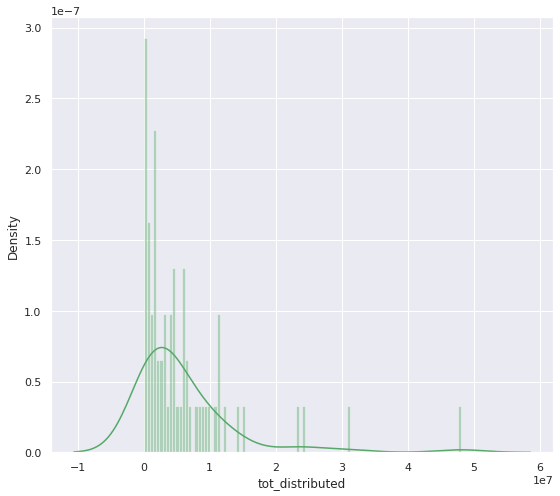

In [82]:
print(df_vacc_totals['tot_distributed'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_vacc_totals['tot_distributed'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    6.400000e+01
mean     5.029028e+06
std      6.609794e+06
min      2.436900e+04
25%      1.139818e+06
50%      2.955154e+06
75%      6.177784e+06
max      3.976440e+07
Name: tot_administered, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


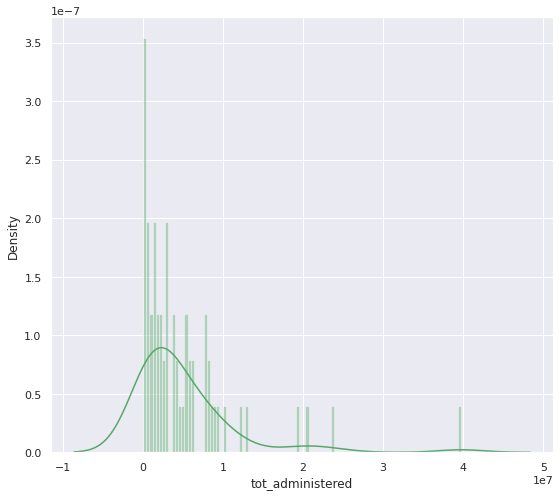

In [83]:
print(df_vacc_totals['tot_administered'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_vacc_totals['tot_administered'], color='g', bins=100, hist_kws={'alpha': 0.4});

count        64.000000
mean     103412.109375
std       31970.873557
min           0.000000
25%       95690.000000
50%      106831.500000
75%      121679.250000
max      148731.000000
Name: tot_dist_per100K, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


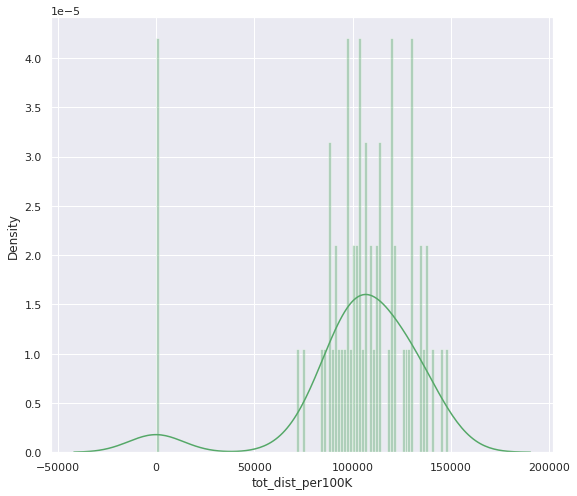

In [84]:
print(df_vacc_totals['tot_dist_per100K'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_vacc_totals['tot_dist_per100K'], color='g', bins=100, hist_kws={'alpha': 0.4});

count        64.00000
mean      83855.12500
std       28106.75379
min           0.00000
25%       74693.75000
50%       86032.50000
75%      101100.75000
max      136086.00000
Name: tot_admin_per100K, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


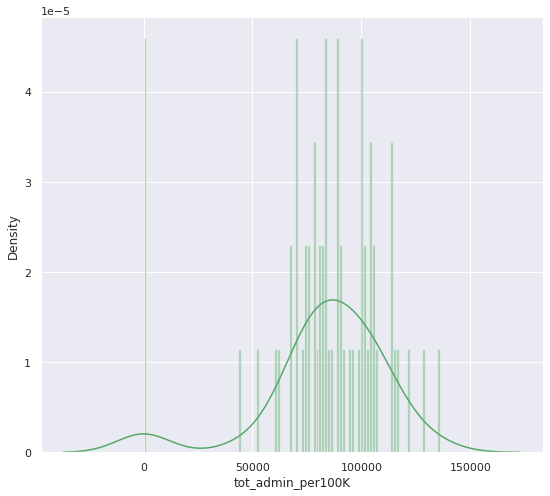

In [85]:
print(df_vacc_totals['tot_admin_per100K'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_vacc_totals['tot_admin_per100K'], color='g', bins=100, hist_kws={'alpha': 0.4});

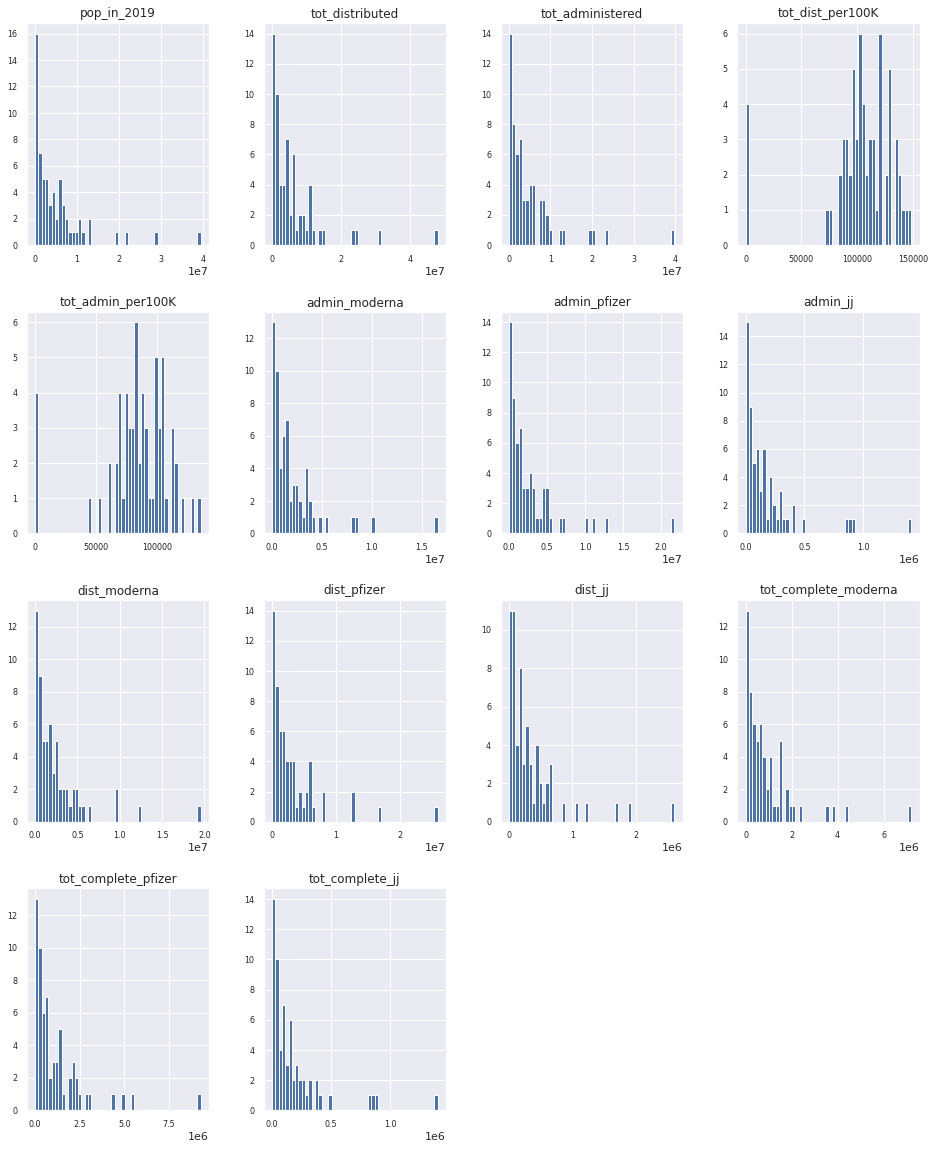

In [86]:
df_vacc_totals.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### full_df

In [87]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2218
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   state                        2219 non-null   object        
 1   week                         2219 non-null   datetime64[ns]
 2   week_num                     2219 non-null   UInt32        
 3   company                      2219 non-null   object        
 4   1st_dose                     2219 non-null   object        
 5   2nd_dose                     1708 non-null   object        
 6   covid_19_deaths              2219 non-null   object        
 7   cum_cases                    2219 non-null   int64         
 8   daily_new_cases              2219 non-null   int64         
 9   daily_new_deaths             2219 non-null   int64         
 10  avg_new_cases                2219 non-null   int64         
 11  cum_deaths                   2219 non-null 

In [88]:
full_df.shape

(2219, 18)

state                           11
week                            14
week_num                        14
company                          3
1st_dose                       165
2nd_dose                       112
covid_19_deaths                 88
cum_cases                      840
daily_new_cases                687
daily_new_deaths               111
avg_new_cases                  672
cum_deaths                     748
avg_new_deaths                 111
cum_new_cases_per100K          808
cum_new_deaths_per100K         301
date                            98
historical_new_total_cases       0
historical_new_total_deaths      0
dtype: int64


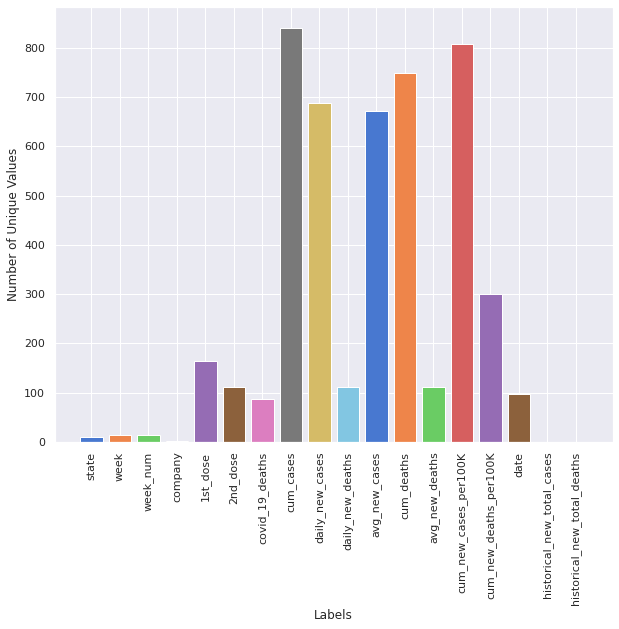

In [89]:
unique_vals = full_df.apply(pd.Series.nunique, axis='rows')
print(unique_vals)
labels = list(unique_vals.index)
plt.figure(figsize=(10, 8))
plt.bar(x = labels, height = unique_vals.values, color = sns.color_palette('muted'))
plt.xticks(unique_vals.index, labels, rotation = 'vertical')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of Unique Values')
plt.show()

In [90]:
print(full_df.isnull().sum())

state                             0
week                              0
week_num                          0
company                           0
1st_dose                          0
2nd_dose                        511
covid_19_deaths                   0
cum_cases                         0
daily_new_cases                   0
daily_new_deaths                  0
avg_new_cases                     0
cum_deaths                        0
avg_new_deaths                    0
cum_new_cases_per100K             0
cum_new_deaths_per100K            0
date                              0
historical_new_total_cases     2219
historical_new_total_deaths    2219
dtype: int64


In [91]:
full_df[full_df["2nd_dose"].isnull()]

,state,week,week_num,company,1st_dose,2nd_dose,covid_19_deaths,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K,date,historical_new_total_cases,historical_new_total_deaths
0,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48195,15,0,41,1110,0,41.37,0.57,2021-05-10,NaN,NaN
1,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48282,87,3,42,1113,1,41.94,0.99,2021-05-11,NaN,NaN
2,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48336,54,2,42,1115,0,41.80,0.85,2021-05-12,NaN,NaN
3,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48404,68,0,46,1115,0,45.91,0.71,2021-05-13,NaN,NaN
4,District of Columbia,2021-05-10,19,Janssen,1300,NaN,13,48424,20,1,41,1116,0,40.81,0.85,2021-05-14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,California,2021-03-01,9,Janssen,320100,NaN,826,3525405,3249,130,3196,59089,149,56.62,2.65,2021-03-03,NaN,NaN
1515,California,2021-03-01,9,Janssen,320100,NaN,826,3528596,3191,120,3098,59209,143,54.89,2.53,2021-03-04,NaN,NaN
1516,California,2021-03-01,9,Janssen,320100,NaN,826,3531528,2932,116,3024,59325,137,53.59,2.43,2021-03-05,NaN,NaN
1517,California,2021-03-01,9,Janssen,320100,NaN,826,3534442,2914,108,2959,59433,130,52.42,2.31,2021-03-06,NaN,NaN


In [92]:
full_df = full_df.drop(['historical_new_total_cases','historical_new_total_deaths'], axis=1)

In [93]:
full_df = full_df.fillna(0)

In [94]:
print(full_df.isnull().sum())

state                     0
week                      0
week_num                  0
company                   0
1st_dose                  0
2nd_dose                  0
covid_19_deaths           0
cum_cases                 0
daily_new_cases           0
daily_new_deaths          0
avg_new_cases             0
cum_deaths                0
avg_new_deaths            0
cum_new_cases_per100K     0
cum_new_deaths_per100K    0
date                      0
dtype: int64


In [95]:
duplicate_rows_df = full_df[full_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


In [96]:
full_df.describe().T

,count,mean,std,min,25%,50%,75%,max
week_num,2219.0,1.476972e+01,3.830100e+00,9.00,12.000,14.00,18.00,22.00
cum_cases,2219.0,1.040029e+06,1.090859e+06,40684.00,330970.000,534575.00,1109958.00,3690868.00
daily_new_cases,2219.0,1.226598e+03,1.456476e+03,0.00,263.000,702.00,1600.50,8925.00
daily_new_deaths,2219.0,2.146237e+01,2.903718e+01,0.00,2.000,9.00,28.00,159.00
avg_new_cases,2219.0,1.263990e+03,1.394442e+03,21.00,320.000,802.00,1514.00,6651.00
cum_deaths,2219.0,1.810222e+04,1.821386e+04,358.00,5972.000,10920.00,20368.00,62473.00
avg_new_deaths,2219.0,2.232853e+01,2.765358e+01,0.00,5.000,9.00,33.00,162.00
cum_new_cases_per100K,2219.0,9.972535e+01,6.135628e+01,10.31,48.415,83.50,145.71,268.03
cum_new_deaths_per100K,2219.0,1.612014e+00,1.113602e+00,0.00,0.860,1.31,2.05,6.57


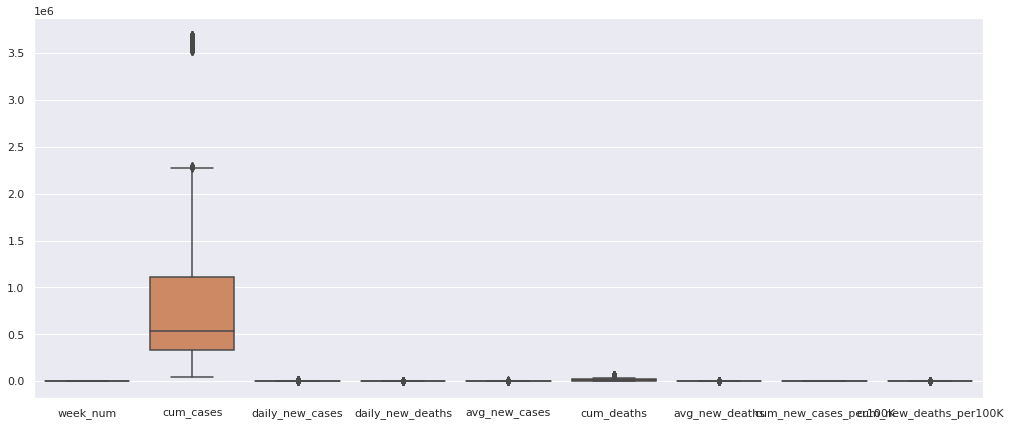

In [97]:
plt.figure(figsize=(17,7))
sns.boxplot(data=full_df)

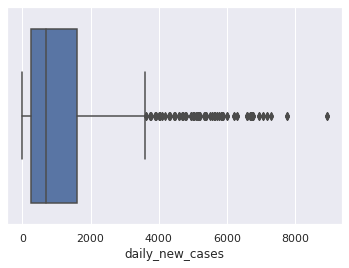

In [98]:
sns.boxplot(x=full_df['daily_new_cases'])

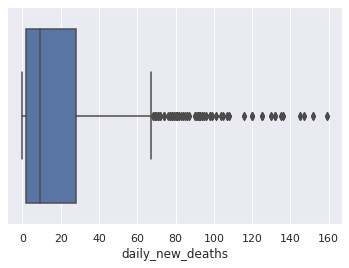

In [99]:
sns.boxplot(x=full_df['daily_new_deaths'])

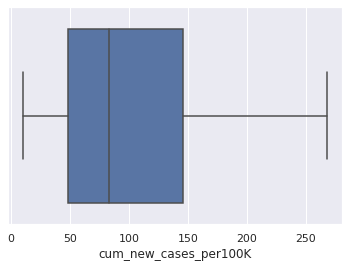

In [100]:
sns.boxplot(x=full_df['cum_new_cases_per100K'])

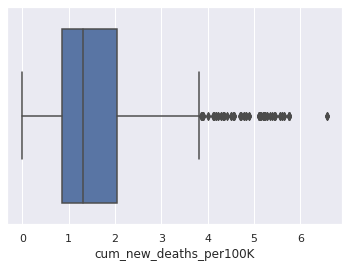

In [101]:
sns.boxplot(x=full_df['cum_new_deaths_per100K'])

In [102]:
states = list(full_df.state.unique())
states

['District of Columbia',
 'Alabama',
 'Florida',
 'Georgia',
 'Arkansas',
 'Colorado',
 'Arizona',
 'California',
 'Connecticut',
 'Delaware',
 'Alaska']

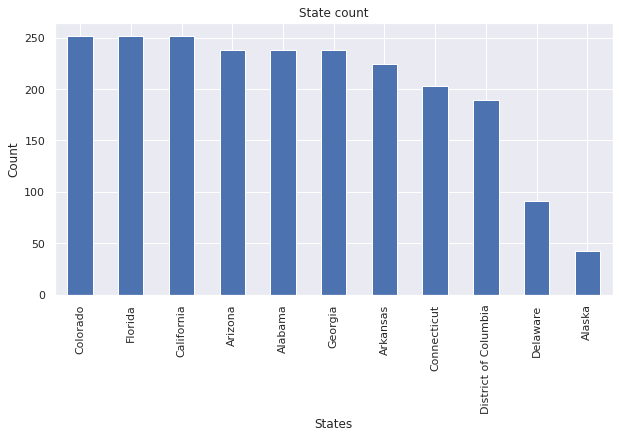

In [103]:
full_df.state.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("State count")
plt.ylabel('Count')
plt.xlabel('States');

,week_num,cum_cases,daily_new_cases,daily_new_deaths,avg_new_cases,cum_deaths,avg_new_deaths,cum_new_cases_per100K,cum_new_deaths_per100K
week_num,1.000000,0.082400,-0.145475,-0.257240,-0.150731,0.073710,-0.300884,-0.368985,-0.559002
cum_cases,0.082400,1.000000,0.539302,0.533458,0.583186,0.996474,0.614469,-0.281521,-0.099470
daily_new_cases,-0.145475,0.539302,1.000000,0.699970,0.942627,0.514540,0.716729,0.343244,0.197188
daily_new_deaths,-0.257240,0.533458,0.699970,1.000000,0.712198,0.525356,0.876222,0.088382,0.436431
avg_new_cases,-0.150731,0.583186,0.942627,0.712198,1.000000,0.556363,0.781354,0.358112,0.226563
cum_deaths,0.073710,0.996474,0.514540,0.525356,0.556363,1.000000,0.606184,-0.304920,-0.093023
avg_new_deaths,-0.300884,0.614469,0.716729,0.876222,0.781354,0.606184,1.000000,0.070546,0.494399
cum_new_cases_per100K,-0.368985,-0.281521,0.343244,0.088382,0.358112,-0.304920,0.070546,1.000000,0.283233
cum_new_deaths_per100K,-0.559002,-0.099470,0.197188,0.436431,0.226563,-0.093023,0.494399,0.283233,1.000000


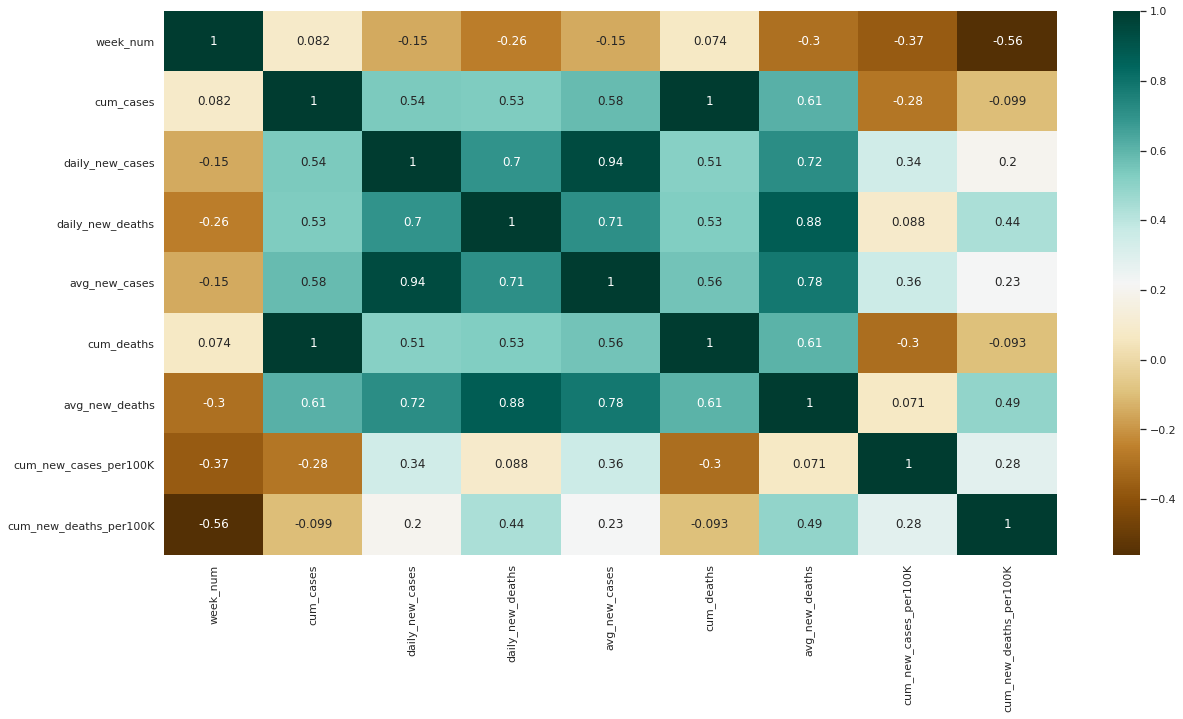

In [104]:
plt.figure(figsize=(20,10))
c= full_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

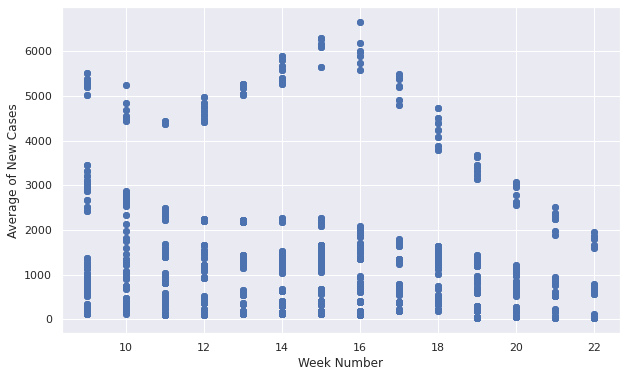

In [105]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(full_df['week_num'], full_df['avg_new_cases'])
ax.set_xlabel('Week Number')
ax.set_ylabel('Average of New Cases')
plt.show()

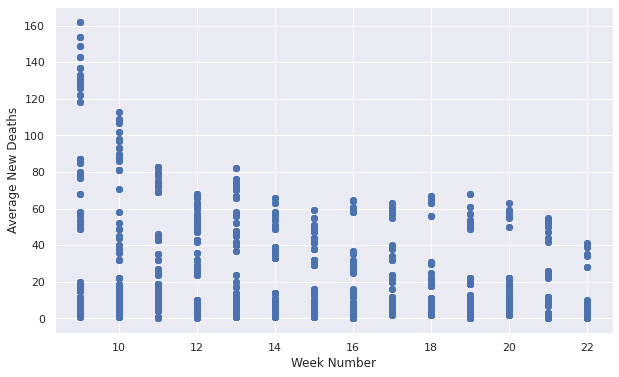

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(full_df['week_num'], full_df['avg_new_deaths'])
ax.set_xlabel('Week Number')
ax.set_ylabel('Average New Deaths')
plt.show()

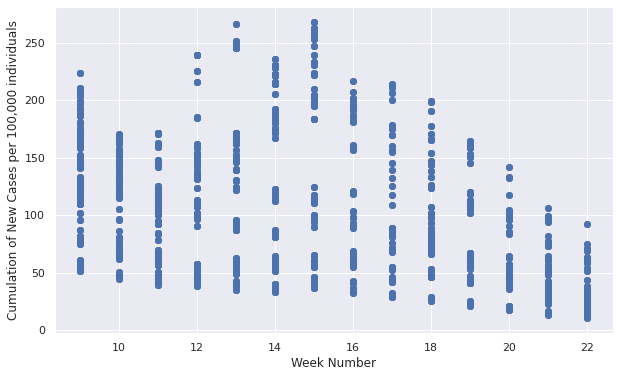

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(full_df['week_num'], full_df['cum_new_cases_per100K'])
ax.set_xlabel('Week Number')
ax.set_ylabel('Cumulation of New Cases per 100,000 individuals')
plt.show()

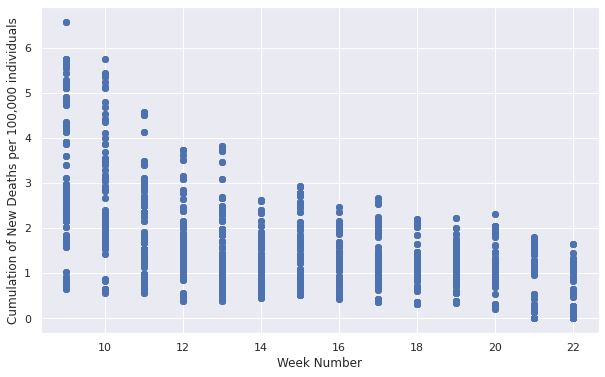

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(full_df['week_num'], full_df['cum_new_deaths_per100K'])
ax.set_xlabel('Week Number')
ax.set_ylabel('Cumulation of New Deaths per 100,000 individuals')
plt.show()

count     2219.000000
mean     18102.222623
std      18213.864456
min        358.000000
25%       5972.000000
50%      10920.000000
75%      20368.000000
max      62473.000000
Name: cum_deaths, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


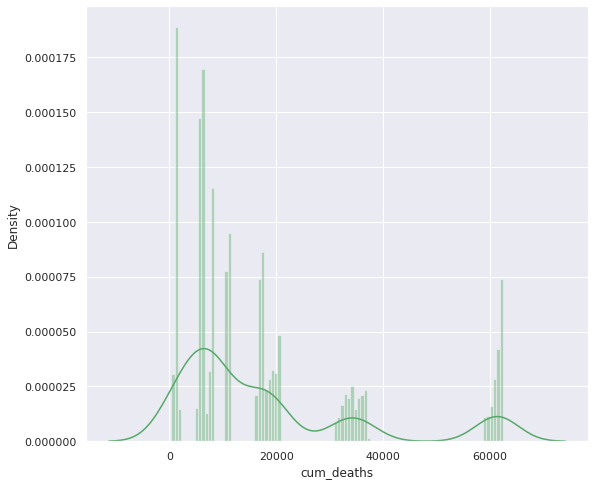

In [109]:
print(full_df['cum_deaths'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(full_df['cum_deaths'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    2219.000000
mean       21.462370
std        29.037177
min         0.000000
25%         2.000000
50%         9.000000
75%        28.000000
max       159.000000
Name: daily_new_deaths, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


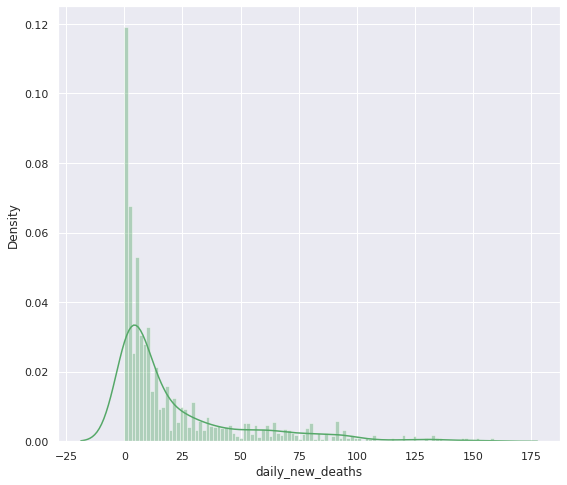

In [110]:
print(full_df['daily_new_deaths'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(full_df['daily_new_deaths'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    2219.000000
mean     1226.597566
std      1456.476054
min         0.000000
25%       263.000000
50%       702.000000
75%      1600.500000
max      8925.000000
Name: daily_new_cases, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


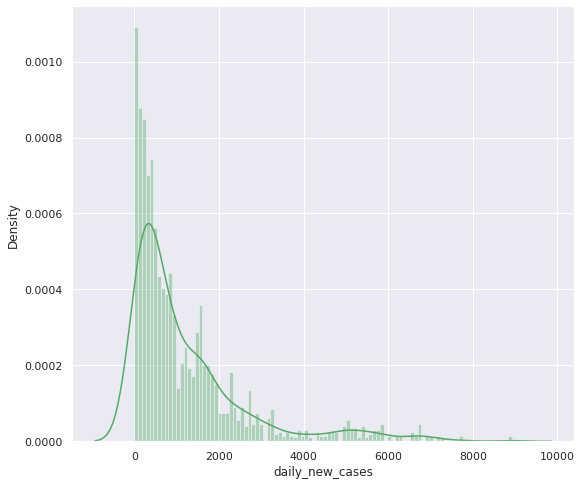

In [111]:
print(full_df['daily_new_cases'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(full_df['daily_new_cases'], color='g', bins=100, hist_kws={'alpha': 0.4});

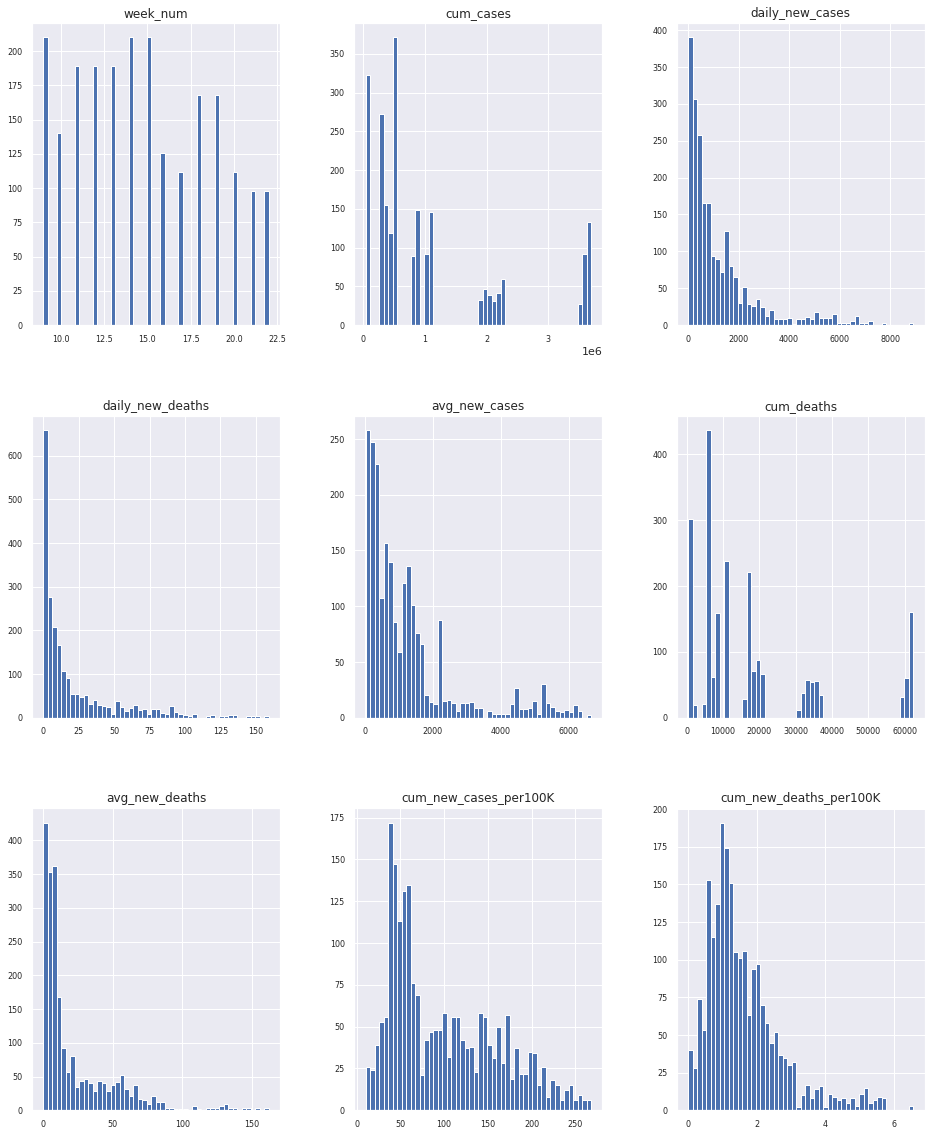

In [112]:
full_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### vacc_demo

In [113]:
vacc_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   date                           1000 non-null   object
 1   demographic_category           1000 non-null   object
 2   administered_dose1             1000 non-null   object
 3   administered_dose1_pct_known   1000 non-null   object
 4   administered_dose1_pct_us      1000 non-null   object
 5   series_complete_yes            1000 non-null   object
 6   administered_dose1_pct         1000 non-null   object
 7   series_complete_pop_pct        1000 non-null   object
 8   series_complete_pop_pct_known  1000 non-null   object
 9   series_complete_pop_pct_us     1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


date                               36
demographic_category               28
administered_dose1               1000
administered_dose1_pct_known      190
administered_dose1_pct_us          22
series_complete_yes              1000
administered_dose1_pct            457
series_complete_pop_pct           411
series_complete_pop_pct_known     228
series_complete_pop_pct_us         31
dtype: int64


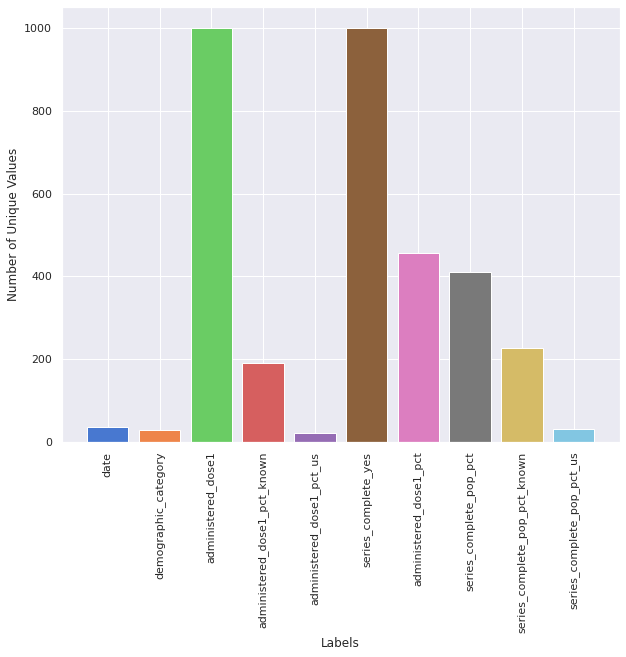

In [114]:
unique_vals = vacc_demo.apply(pd.Series.nunique, axis='rows')
print(unique_vals)
labels = list(unique_vals.index)
plt.figure(figsize=(10, 8))
plt.bar(x = labels, height = unique_vals.values, color = sns.color_palette('muted'))
plt.xticks(unique_vals.index, labels, rotation = 'vertical')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of Unique Values')
plt.show()

In [116]:
print(vacc_demo.isnull().sum())

date                             0
demographic_category             0
administered_dose1               0
administered_dose1_pct_known     0
administered_dose1_pct_us        0
series_complete_yes              0
administered_dose1_pct           0
series_complete_pop_pct          0
series_complete_pop_pct_known    0
series_complete_pop_pct_us       0
dtype: int64


In [117]:
duplicate_rows_df = vacc_demo[vacc_demo.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


### state_data_21

In [119]:
state_data21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9540 entries, 345 to 30239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   state                        9540 non-null   object        
 1   cum_cases                    9540 non-null   int64         
 2   daily_new_cases              9540 non-null   int64         
 3   daily_new_deaths             9540 non-null   int64         
 4   avg_new_cases                9540 non-null   int64         
 5   cum_deaths                   9540 non-null   int64         
 6   avg_new_deaths               9540 non-null   int64         
 7   cum_new_cases_per100K        9540 non-null   float64       
 8   cum_new_deaths_per100K       9540 non-null   float64       
 9   date                         9540 non-null   datetime64[ns]
 10  historical_new_total_cases   159 non-null    float64       
 11  historical_new_total_deaths  159 non-nul

state                            60
cum_cases                      8625
daily_new_cases                3366
daily_new_deaths                452
avg_new_cases                  3428
cum_deaths                     6173
avg_new_deaths                  428
cum_new_cases_per100K          7391
cum_new_deaths_per100K         1095
date                            159
historical_new_total_cases       13
historical_new_total_deaths      27
week_num                         24
dtype: int64


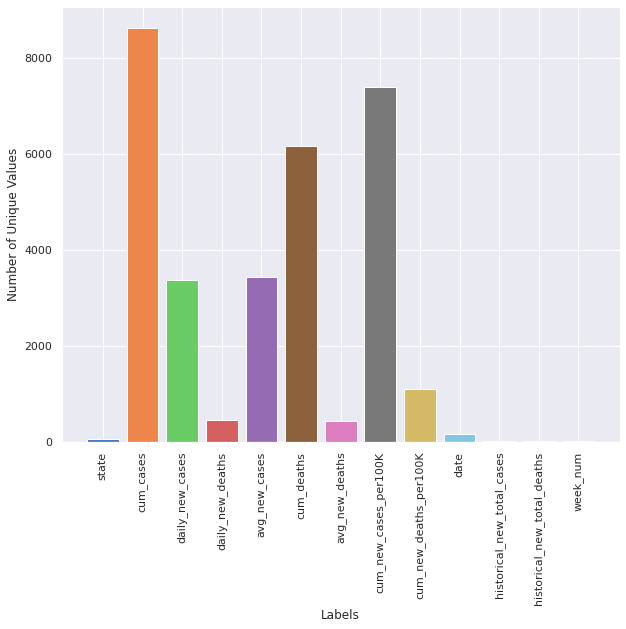

In [121]:
unique_vals = state_data21.apply(pd.Series.nunique, axis='rows')
print(unique_vals)
labels = list(unique_vals.index)
plt.figure(figsize=(10, 8))
plt.bar(x = labels, height = unique_vals.values, color = sns.color_palette('muted'))
plt.xticks(unique_vals.index, labels, rotation = 'vertical')
# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of Unique Values')
plt.show()

In [123]:
print(state_data21.isnull().sum())

state                             0
cum_cases                         0
daily_new_cases                   0
daily_new_deaths                  0
avg_new_cases                     0
cum_deaths                        0
avg_new_deaths                    0
cum_new_cases_per100K             0
cum_new_deaths_per100K            0
date                              0
historical_new_total_cases     9381
historical_new_total_deaths    9381
week_num                          0
dtype: int64


In [124]:
state_data21.shape

(9540, 13)

In [125]:
state_data21 = state_data21.drop(['historical_new_total_cases','historical_new_total_deaths'], axis=1)

## Linear Regression Modeling

For our model, Multiple Linear Regression and Random Forest Regression will be used to predict allocation based on cases, deaths,and population. This can be an effective tool since allocations of vaccines are announced a week beforehand and using the present data, we can predict how much vaccines are gonna be allocated based on those variables. It also works well for new data if we wanted to predict how many vaccines would be allocated to a state/country thats outside of our data based on cases, deaths, and population.

We will also implement a model that takes into account the weeks and state which should be good for predicting an already existing state in our data and their vaccine allocation amount.


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

df_vacc_totals['not_administered_pct'] = (df_vacc_totals.tot_dist_per100K - df_vacc_totals.tot_admin_per100K)/df_vacc_totals.tot_dist_per100K * 100
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", 
               "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", 
               "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", 
               "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan",
               "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", 
               "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico",
               "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
               "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", 
               "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

new_df_vacc = df_vacc_totals[df_vacc_totals['state'].isin(state_names)].reset_index()
df_sorted= new_df_vacc.sort_values('not_administered_pct',ascending=False).head(10)
fig = px.bar(df_sorted, x = "state", y = "not_administered_pct", text = 'not_administered_pct', title = "Top 10 Not Administered Vaccines Ratio Per 100k (%)",
             color = 'state',
             #color = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'],
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_traces(texttemplate = '%{text:.3s}%', textposition = 'outside')
fig.show()

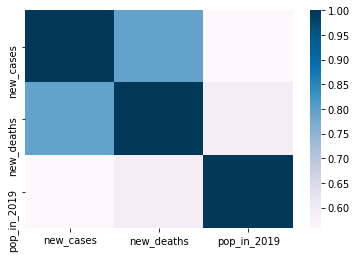

In [ ]:
import seaborn as sns
state_per_week = state_data21.groupby(
   ['week_num','state']
).agg(
    {   'daily_new_cases': ['sum'], # sum of new cases that week
        'daily_new_deaths': ['sum'] # sum of new deaths for that week
    }
).reset_index()
state_per_week
df["1st_dose"] = pd.to_numeric(df["1st_dose"])
dose_per_week = df.groupby(['week_num','state']).agg({'1st_dose':['sum']}) # 
df_mod = pd.merge(state_per_week,dose_per_week,on=['week_num','state']) 
df_numeric = pd.get_dummies(df_mod.state)
df_transformed = pd.concat([df_mod, df_numeric], axis = 1)
df_transformed.rename(columns={df_transformed.columns[0]: "week_num",
                               df_transformed.columns[1]: "state",
                               df_transformed.columns[2]: "new_cases",
                               df_transformed.columns[3]: "new_deaths",
                               df_transformed.columns[4]: "dose"}, inplace = True)
df_transformed.state.unique()
df_pop = df_vacc_totals[['state','pop_in_2019']]
df_transformed = df_pop.merge(df_transformed,on = 'state')
Y = df_transformed['dose']
X = df_transformed[['new_cases','new_deaths','pop_in_2019']]
sns.heatmap(X.corr(), cmap = 'PuBu');

No multicollinearity between predictors.


*Dose 1 and Dose 2 are the same amount allocated however we will count them together as one dose allocated. 

### Predicting with cases/deaths/pop

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression(normalize = True)
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.974387150090667

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 2, n_estimators = 10, random_state = 0, criterion = 'mse')
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.9653117576551982

### Predicting with cases/deaths

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
Y = df_transformed['dose']
X = df_transformed[['new_cases','new_deaths']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression(normalize = True)
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.35904191552352666

In [ ]:
regr = RandomForestRegressor(max_depth = 12, n_estimators = 50, random_state = 0, criterion = 'mse')
regr.fit(X_train, Y_train)
regr.score(X_test,Y_test)

0.7296342774823763

### Predicting with pop

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
Y = df_transformed['dose']
X = df_transformed[['pop_in_2019']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 50)
regr = linear_model.LinearRegression(normalize = True)
regr.fit(X_train, Y_train)
regr.score(X_test,Y_test)

0.98887970942369

In [ ]:
regr = RandomForestRegressor(max_depth = 12, n_estimators = 50, random_state = 0, criterion = 'mse')
regr.fit(X_train, Y_train)
regr.score(X_test,Y_test)

0.9881943295992618

Our highest predictive model has an accuracy of 93% using cases/deaths/population. After investigating other models, it is evident that the biggest predictor in how many doses are allocated to a state is its population with cases/deaths increasing the accuracy by slightly. 

## Predicting w/ States and Weeks

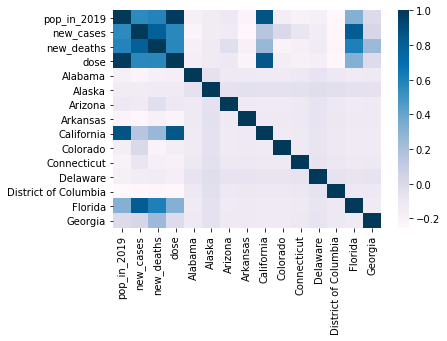

In [ ]:
sns.heatmap(df_transformed.corr(), cmap = 'PuBu');

In [ ]:
Y = df_transformed['dose']
X = df_transformed.drop(['dose','state'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 50)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_test,Y_test)

0.9875087866713682

In [ ]:
regr = RandomForestRegressor(max_depth = 12, n_estimators = 50, random_state = 0, criterion = 'mse')
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.9830530029206256

## Model Comparison

We can predict with vaccine allocation amount with a 92% accuracy for an already existing state in our data. However, this is extremely close to our model that only uses cases/deaths/population. This possibly means that the specific state doesn't provide much predictive power when determining vaccine allocation amount. Therefore, our multiple linear regression model that uses cases,deaths, and population is just as effective while also being simpler so we go with this model.

# Clustering Model

In [ ]:
vacc_demo.demographic_category

0           Ages_75+_yrs
1       Race_eth_NHAsian
2       Race_eth_NHNHOPI
3       Race_eth_unknown
4        Race_eth_NHAIAN
             ...        
995    Race_eth_Hispanic
996      Race_eth_NHAIAN
997             Sex_Male
998       Ages_16-17_yrs
999     Race_eth_unknown
Name: demographic_category, Length: 1000, dtype: object

In [ ]:
import sklearn.decomposition as decomp
import sklearn.preprocessing as pre
df_numeric = pd.get_dummies(vacc_demo.demographic_category)
df_comb = pd.concat([vacc_demo, df_numeric], axis = 1)
df_comb = df_comb.drop('demographic_category',axis=1)
df_comb = df_comb.drop("date",axis=1) # dropped date

## PCA

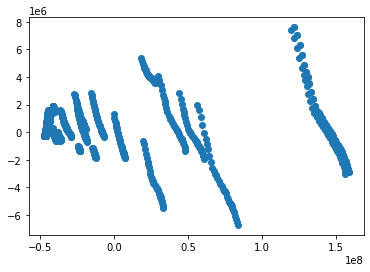

In [ ]:
x_new_pca = decomp.PCA(2, random_state = 0).fit_transform(df_comb)
plt.scatter(x_new_pca[:,0], x_new_pca[:,1])
plt.show()

## KMeans

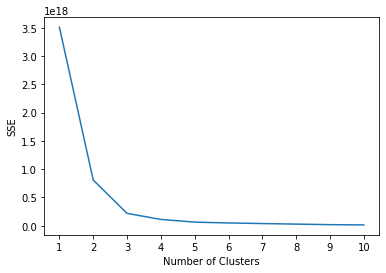

In [ ]:
from sklearn.cluster import KMeans
sse =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(x_new_pca)
    # calculates squared error
    # for the clustered points
    sse.append(KM.inertia_)     


plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

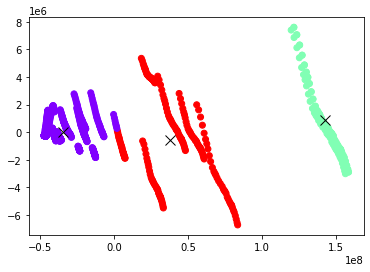

0.755904405527062

In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_new_pca)
plt.scatter(x_new_pca[:,0], x_new_pca[:,1],c = kmeans.labels_, cmap = 'rainbow')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],'x',
             markeredgecolor='k', markersize=10)
plt.show()
silhouette_score(x_new_pca, kmeans.labels_)

## DBScan

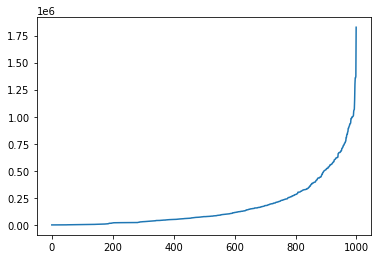

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_new_pca)
distances, indices = nbrs.kneighbors(x_new_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

0.7585496788841144

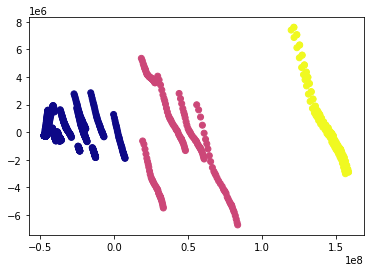

In [ ]:
dbscan = DBSCAN(eps=7000000., min_samples=2).fit(x_new_pca)
pred_y = dbscan.fit_predict(x_new_pca)
# plot the cluster assignments
plt.scatter(x_new_pca[:, 0], x_new_pca[:, 1], c=pred_y, cmap="plasma")
silhouette_score(x_new_pca, dbscan.labels_)

0.7533056436471283

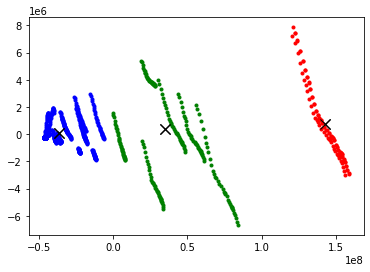

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(x_new_pca, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(x_new_pca)
labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(x_new_pca[my_members, 0], x_new_pca[my_members, 1], col + '.')
    plt.plot(meanshift.cluster_centers_[:,0], meanshift.cluster_centers_[:,1], 'x', markerfacecolor=col,
            markeredgecolor='k', markersize=10)
    
silhouette_score(x_new_pca, meanshift.labels_)

# Model Comparison

After comparing clustering models, our silhouette scores are all above .70 showing that we've recovered most of the shape and that our clusters are good. Meanshift and DBScan perform the best slightly having an edge over Kmeans.